# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [ ]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor, OptunaStudy

# Dataset

In [2]:
DIR = 'bug'

seed = 1736114453#randint(0, 4294967295)
print(seed)

1736114453


In [3]:
setup = ExpSetup(DIR, seed, 1)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 997


c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\experiment_setup.py:95: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'NO_BUG':0, 'BUG':1})
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[REGISTERED: DTREE]
[Training]

Accuracy:         0.9982
Recall:           1.0000
Precision:        0.9965
F1:               0.9982
AUROC:            1.0000
AUPR:             0.9999
1-maxProb média:  0.0018
1-maxProb dp:     0.0139

[Testing]

Accuracy:         0.7622
Recall:           0.3000
Precision:        0.4706
F1:               0.3664
AUROC:            0.6004
AUPR:             0.3045
1-maxProb média:  0.0003
1-maxProb dp:     0.0059

[REGISTERED: SGD]
[Training]

Accuracy:         0.7711
Recall:           0.6796
Precision:        0.8319
F1:               0.7481
AUROC:            0.8481
AUPR:             0.8656
1-maxProb média:  0.2569
1-maxProb dp:     0.1432

[Testing]

Accuracy:         0.8023
Recall:           0.6375
Precision:        0.5604
F1:               0.5965
AUROC:            0.8045
AUPR:             0.6593
1-maxProb média:  0.2599
1-maxProb dp:     0.1347

[REGISTERED: LR]
[Training]

Accuracy:         0.7711
Recall:           0.6690
Precision:        0.8407
F1:     

| train_loss: 7.12e-01 | test_loss: 7.12e-01 | reg: 1.47e+01 | : 100%|█| 15/15 [00:17<00:00,  1.16s/


[REGISTERED: KAN]
[Training]

Accuracy:         0.7676
Recall:           0.6408
Precision:        0.8585
F1:               0.7339
AUROC:            0.8217
AUPR:             0.8469
1-maxProb média:  0.2751
1-maxProb dp:     0.1263

[Testing]

Accuracy:         0.8252
Recall:           0.5375
Precision:        0.6418
F1:               0.5850
AUROC:            0.7748
AUPR:             0.6354
1-maxProb média:  0.2949
1-maxProb dp:     0.1109

[REGISTERED: RFOREST]
[Training]

Accuracy:         0.9982
Recall:           1.0000
Precision:        0.9965
F1:               0.9982
AUROC:            0.9999
AUPR:             0.9998
1-maxProb média:  0.0399
1-maxProb dp:     0.0698

[Testing]

Accuracy:         0.8109
Recall:           0.3375
Precision:        0.6750
F1:               0.4500
AUROC:            0.7708
AUPR:             0.5709
1-maxProb média:  0.1540
1-maxProb dp:     0.1393

[REGISTERED: GB]
[Training]

Accuracy:         0.9982
Recall:           1.0000
Precision:        0.9965
F1:   

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[REGISTERED: ADAB]
[Training]

Accuracy:         0.9912
Recall:           0.9859
Precision:        0.9964
F1:               0.9912
AUROC:            0.9996
AUPR:             0.9995
1-maxProb média:  0.4859
1-maxProb dp:     0.0162

[Testing]

Accuracy:         0.7994
Recall:           0.4000
Precision:        0.5926
F1:               0.4776
AUROC:            0.7229
AUPR:             0.5687
1-maxProb média:  0.4879
1-maxProb dp:     0.0145

[REGISTERED: XGB]
[Training]

Accuracy:         0.9947
Recall:           1.0000
Precision:        0.9895
F1:               0.9947
AUROC:            0.9999
AUPR:             0.9999
1-maxProb média:  0.0470
1-maxProb dp:     0.0514

[Testing]

Accuracy:         0.8052
Recall:           0.3375
Precision:        0.6429
F1:               0.4426
AUROC:            0.7848
AUPR:             0.6130
1-maxProb média:  0.0891
1-maxProb dp:     0.1180



In [4]:
#df = pd.read_csv(f'data/{DIR}/bug dataset.csv', header=0)
#print(df.dtypes)
#
#from sklearn.preprocessing import StandardScaler
#
#X = df.drop(columns=['class'])
#y = df['class']
#
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(X, y)

n_versions          int64
n_fixes             int64
n_refact            int64
n_authors           int64
lines_added         int64
max_lin_add         int64
avg_lin_add       float64
lines_rem           int64
max_lin_rem         int64
avg_lin_rem       float64
code_churn          int64
max_code_churn      int64
avg_code_churn    float64
age               float64
weighted_age      float64
class              object
dtype: object

In [ ]:
#Xa_train = setup.Xa_train
#Xa_train_norm = setup.Xb_test_norm
#Xa_test = setup.Xa_test
#Xa_test_norm = setup.Xa_test_norm
#ya_train = setup.ya_train
#ya_test = setup.ya_test
#pred_corrls = setup.pred_corrls
#pred_corrls2 = setup.pred_corrls2
#performs = setup.performs

# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [4]:
groups = {}
model_names = list(performs.keys())

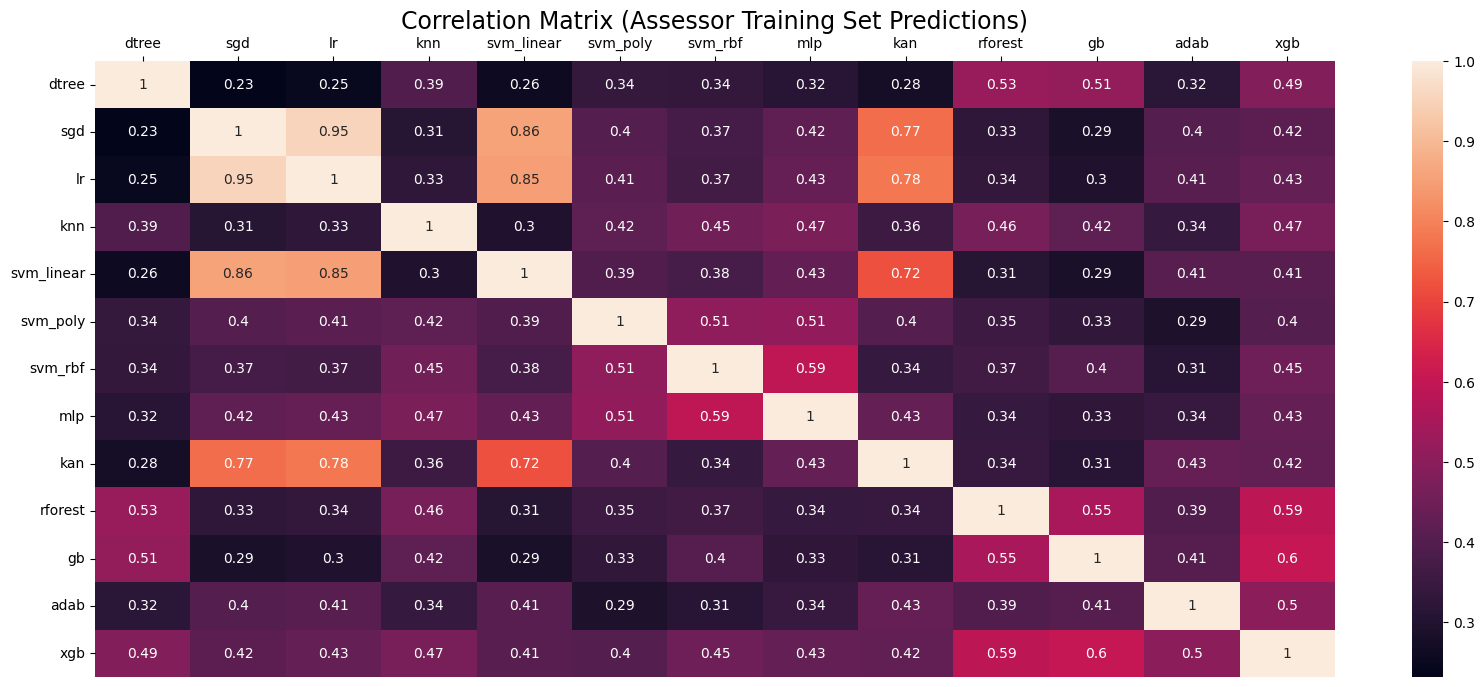

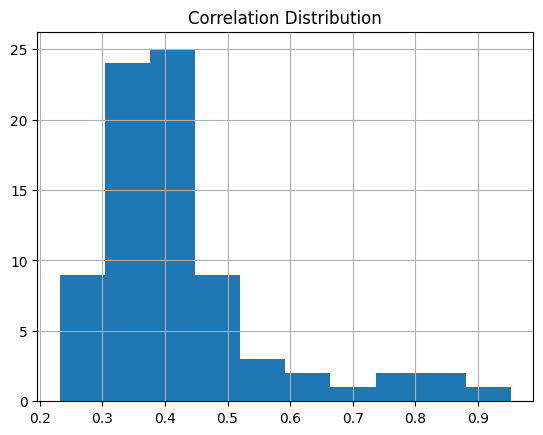

Training correlation distribution:
count    78.000000
mean      0.424883
std       0.141126
min       0.231939
25%       0.336014
50%       0.402607
75%       0.451494
max       0.952866
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [5]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [6]:
MIN_SCORE = 0.55 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.55


[['gb', 'rforest', 'xgb'],
 ['mlp', 'svm_rbf'],
 ['knn'],
 ['dtree'],
 ['adab'],
 ['svm_poly'],
 ['sgd', 'lr', 'kan', 'svm_linear']]

Conjunto de Teste:

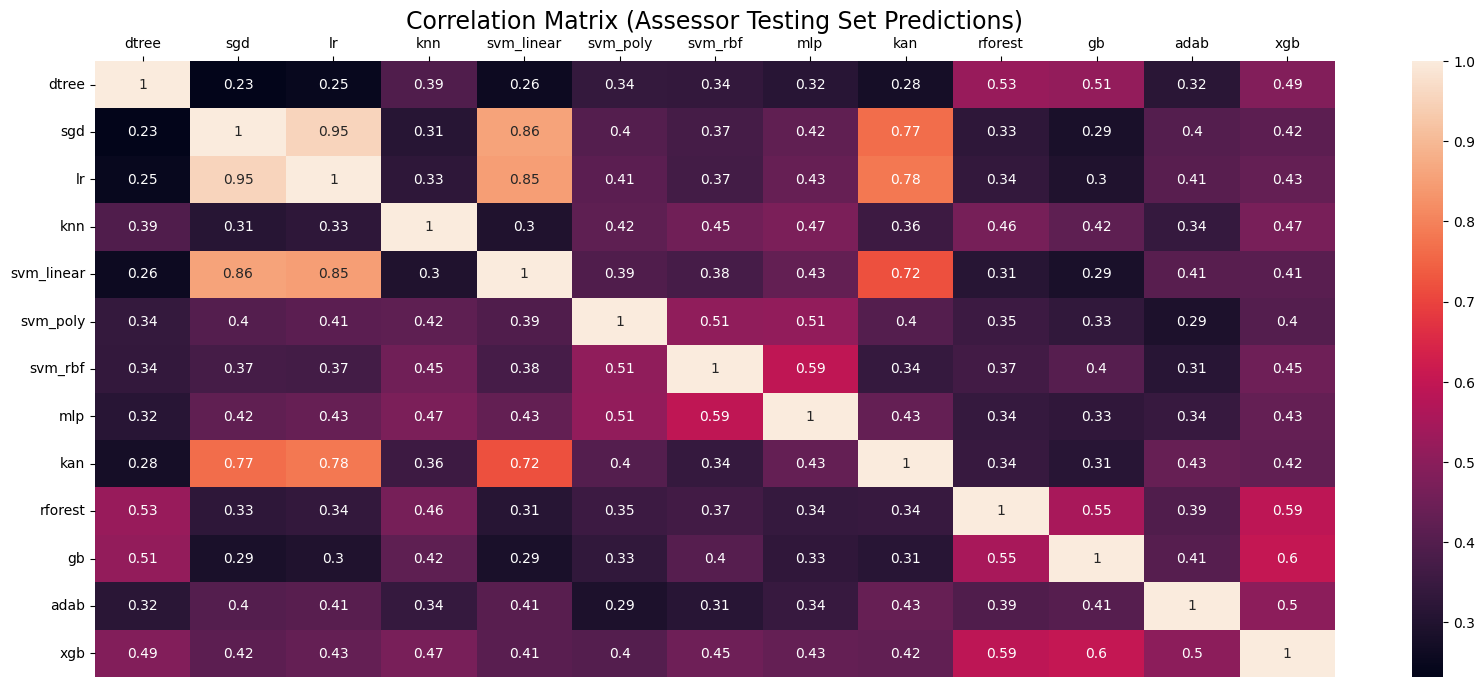

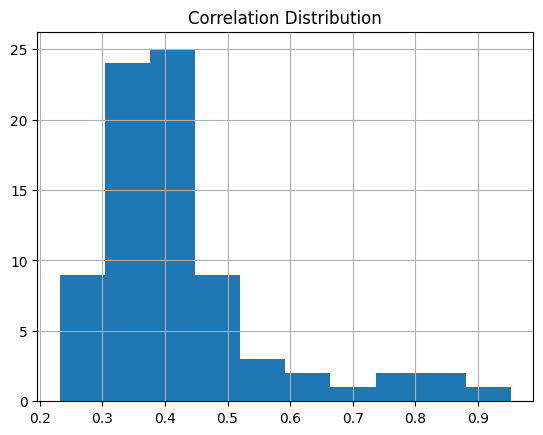

Testing correlation distribution:
count    78.000000
mean      0.424883
std       0.141126
min       0.231939
25%       0.336014
50%       0.402607
75%       0.451494
max       0.952866
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [7]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Testing')

In [8]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['gb', 'rforest', 'xgb'],
 ['mlp', 'svm_rbf'],
 ['knn'],
 ['dtree'],
 ['adab'],
 ['svm_poly'],
 ['sgd', 'lr', 'kan', 'svm_linear']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0011
NMSE: 0.0309
MAE:  0.0255
NMAE: 0.1933
aRRMSE: 0.1697
aCC:  0.9888


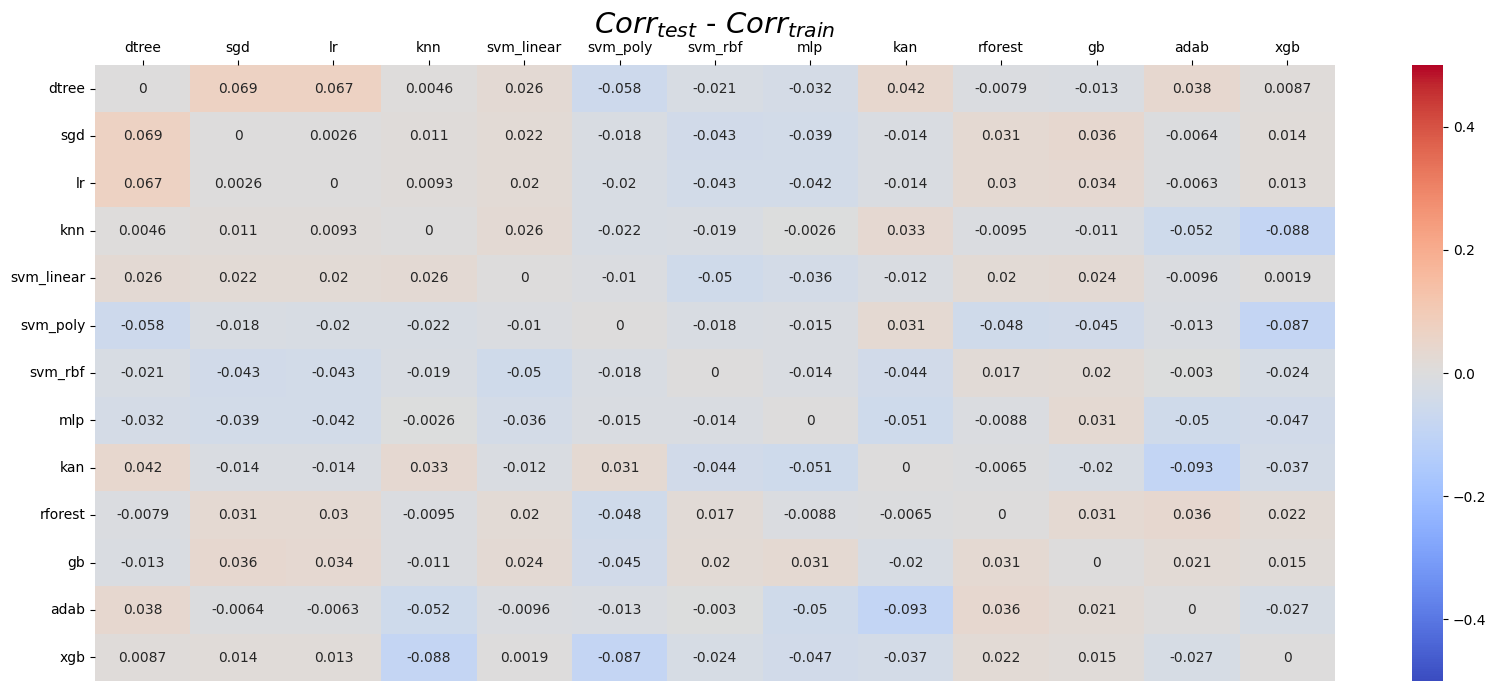

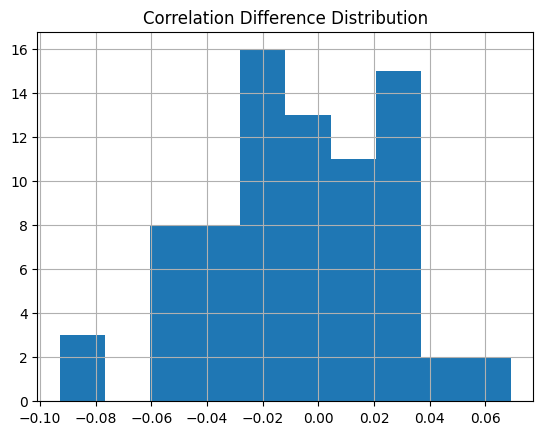

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [9]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [10]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [ ]:
# Criando o MultiIndex
multi_index = multIdx('ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)', subindex=model_names)

metrics_cols = ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC']
metrics_df = pd.DataFrame(columns=metrics_cols, index=multi_index)
diff_metrics = pd.DataFrame(columns=metrics_cols, index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [ ]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [ ]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True, order='random').fit(Xa_train, ya_train)

[Chain] .................. (1 of 13) Processing order 0, total=   0.2s
[Chain] .................. (2 of 13) Processing order 1, total=   0.3s
[Chain] .................. (3 of 13) Processing order 2, total=   0.3s
[Chain] .................. (4 of 13) Processing order 3, total=   0.3s
[Chain] .................. (5 of 13) Processing order 4, total=   0.3s
[Chain] .................. (6 of 13) Processing order 5, total=   0.3s
[Chain] .................. (7 of 13) Processing order 6, total=   0.3s
[Chain] .................. (8 of 13) Processing order 7, total=   0.4s
[Chain] .................. (9 of 13) Processing order 8, total=   0.4s
[Chain] ................. (10 of 13) Processing order 9, total=   0.3s
[Chain] ................ (11 of 13) Processing order 10, total=   0.5s
[Chain] ................ (12 of 13) Processing order 11, total=   0.5s
[Chain] ................ (13 of 13) Processing order 12, total=   0.4s


In [43]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0354
NMSE: 0.4155
MAE: 0.1225
NMAE: 0.5537
aRRMSE: 0.6358
aCC: 0.7908

[TESTING SET]
MSE: 0.0752
NMSE: 0.8452
MAE: 0.1814
NMAE: 0.8120
aRRMSE: 0.9190
aCC: 0.4015


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
dtree       0.153325  0.849345  0.287726  0.796725  0.921599    0.3973
sgd         0.039757  0.775333  0.128143  0.721634   0.88053  0.484097
lr          0.037823  0.819402  0.127506  0.763722  0.905209  0.442932
knn         0.119159  0.875736  0.271783  0.883895  0.935808  0.356334
svm_linear  0.041716  0.816263   0.13343  0.756575  0.903473  0.442569
svm_poly    0.049254  0.917199  0.160249  0.908317  0.957705  0.307083
svm_rbf     0.072548  0.817181  0.200329  0.809011  0.903981  0.433192
mlp         0.131575  0.906198  0.269716  0.866634  0.951944  0.332126
kan         0.034045  0.864536  0.112453  0.785782  0.929805  0.388228
rforest      0.06248  0.761486  0.177623  0.777406  0.872632  0.489902
gb          0.142498  0.908456  0.267274  0.814502  0.953129  0.322579
adab        0.000255   0.81842  0.008455  0.852221  0.904665   0.44199
xgb         0.093725  0.858603  0.213941  0.820167  0.926608   0.38107

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

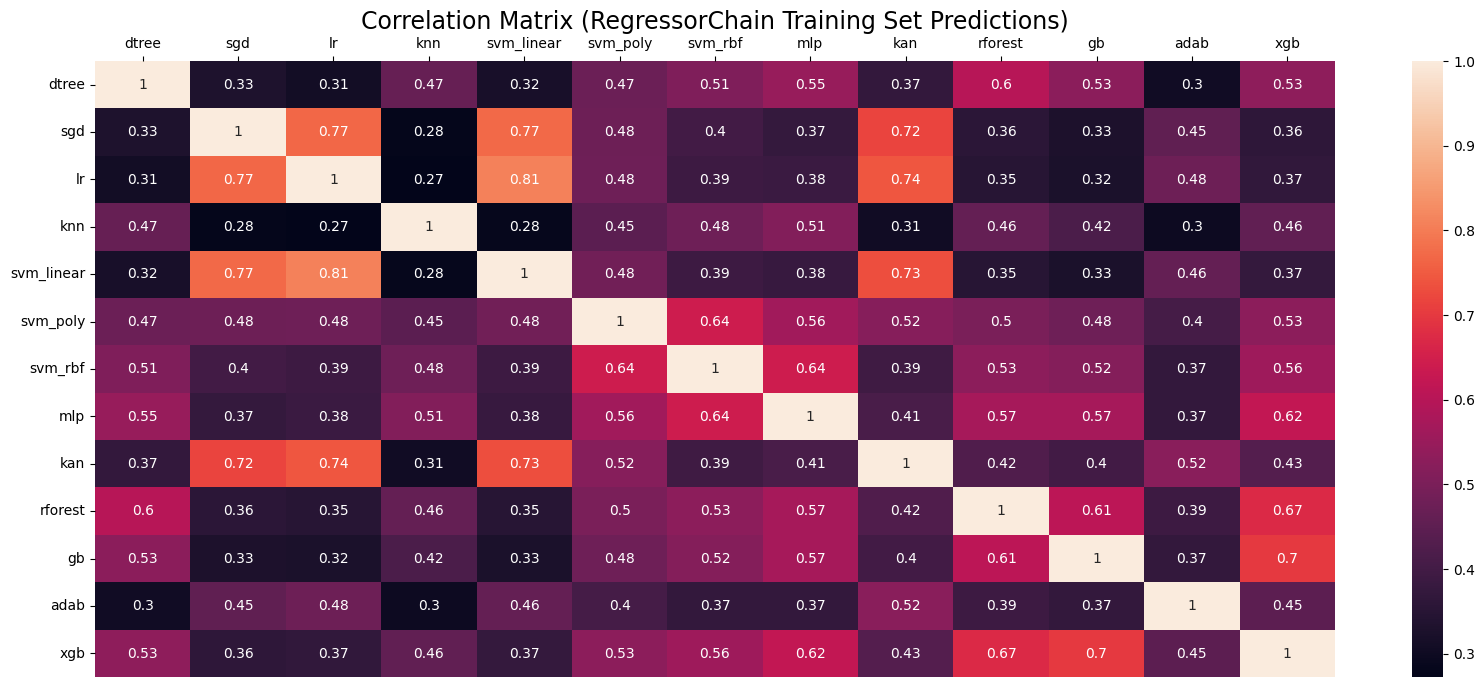

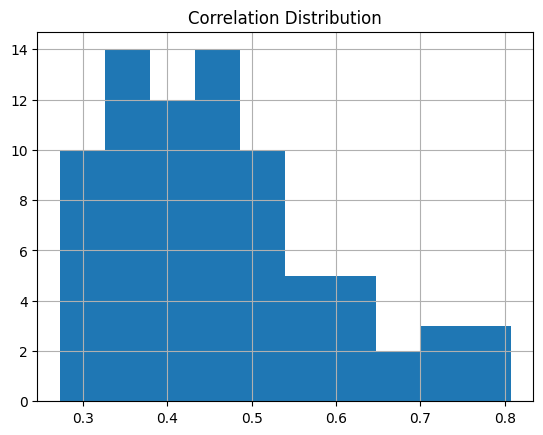

Training correlation distribution:
count    78.000000
mean      0.467472
std       0.129662
min       0.272396
25%       0.370168
50%       0.453642
75%       0.530536
max       0.807184
Name: corr, dtype: float64


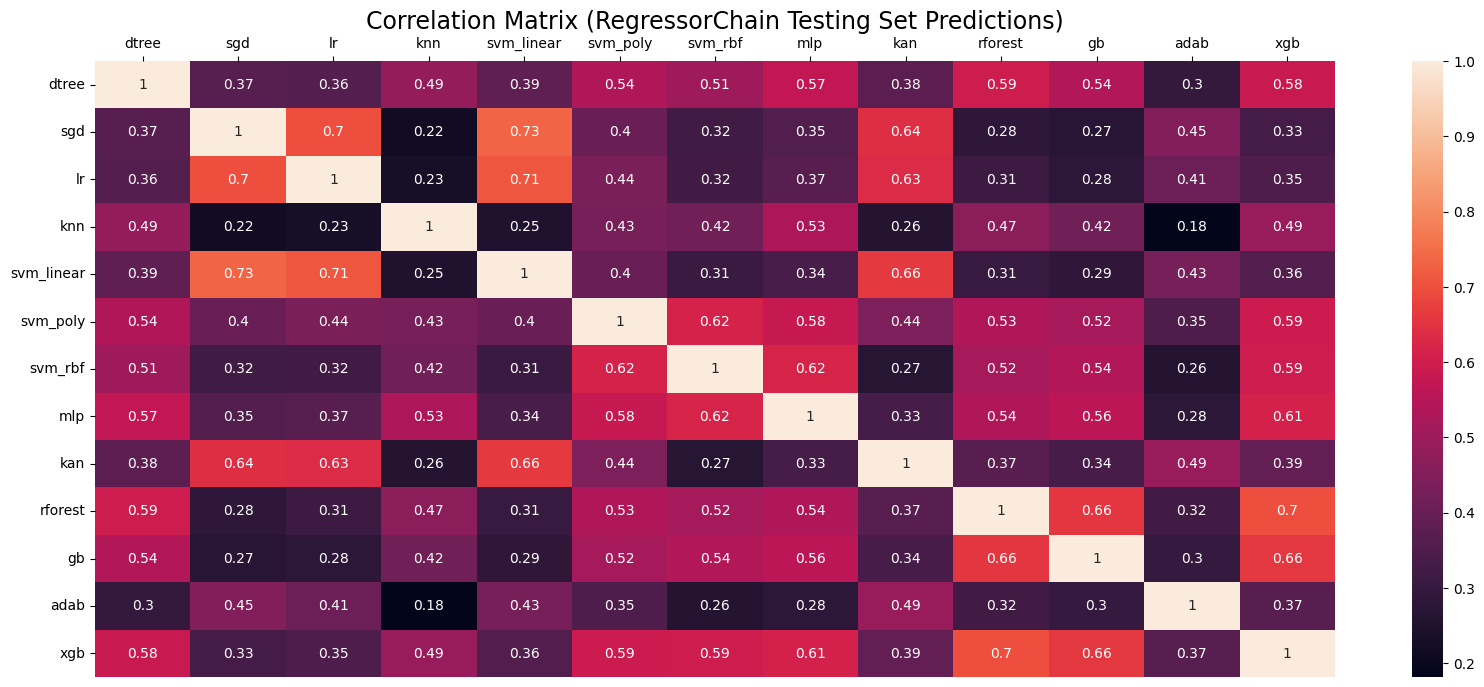

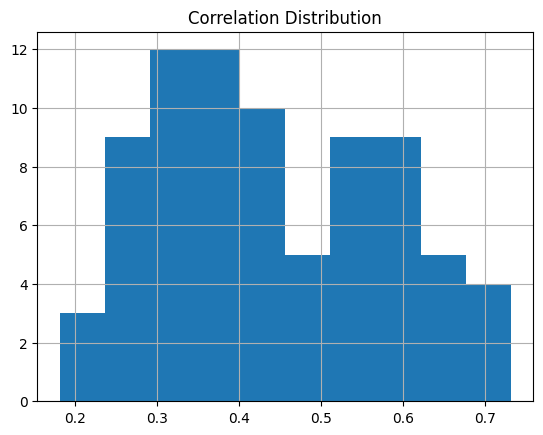

Testing correlation distribution:
count    78.000000
mean      0.439426
std       0.139631
min       0.181707
25%       0.326047
50%       0.412037
75%       0.542128
max       0.731576
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0118
NMSE: 0.0814
MAE: 0.3260
NMAE: 0.6029
aRRMSE: 0.5475
aCC: 0.8894


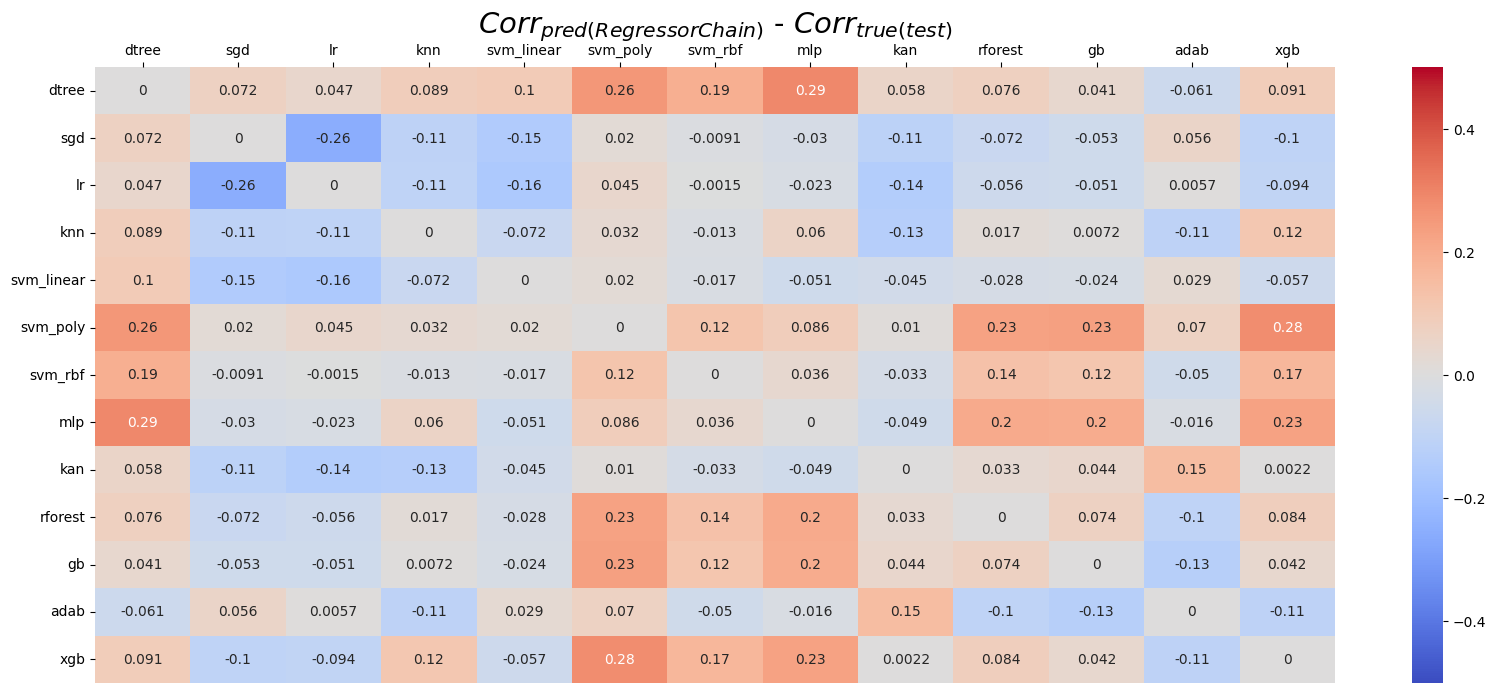

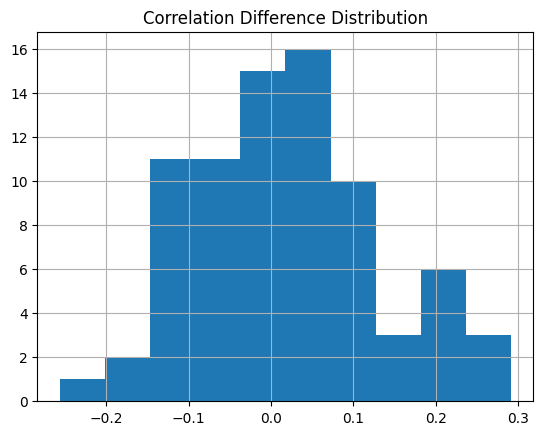

In [44]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [45]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE        0.01179
MAE       0.081355
NMSE      0.325962
NMAE      0.602948
aRRMSE    0.547532
aCC       0.889447
Name: RC, dtype: object

In [46]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['sgd', 'lr', 'kan', 'svm_linear'],
 ['dtree', 'mlp', 'xgb'],
 ['mlp', 'svm_rbf', 'svm_poly', 'xgb'],
 ['xgb', 'mlp', 'gb'],
 ['dtree', 'rforest', 'xgb'],
 ['xgb', 'rforest', 'gb'],
 ['knn'],
 ['adab']]

### Ensemble of Regressor Chains

In [ ]:
num_chains = 10
rc_ac = f'RC[{num_chains}]'

rc_ests = [RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                          random_state=seed+i,
                          order='random', cv=5) for i in range(num_chains)]

rc_plus = GroupedAssessor(rc_ests).fit(Xa_train, ya_train)

In [ ]:
# keeping the concat because multiple numbers of chains could be recorded
if(rc_ac in metrics_df.index):
    metrics_df.loc[rc_ac,:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rc_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])
metrics_df.loc[rc_ac,:]

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

In [ ]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

In [ ]:
diff_metrics.loc[rc_ac,:] = results['results']
diff_metrics.loc[rc_ac,:]

In [ ]:
groups[f'regchain{num_chains}_assessor'] = results['groups']
groups[f'regchain{num_chains}_assessor']['test']

### Multi-Output Random Forest Regressor 

In [47]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [48]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0098
NMSE: 0.1102
MAE: 0.0635
NMAE: 0.2866
aRRMSE: 0.3317
aCC: 0.9709

[TESTING SET]
MSE: 0.0759
NMSE: 0.8507
MAE: 0.1767
NMAE: 0.7922
aRRMSE: 0.9220
aCC: 0.4000


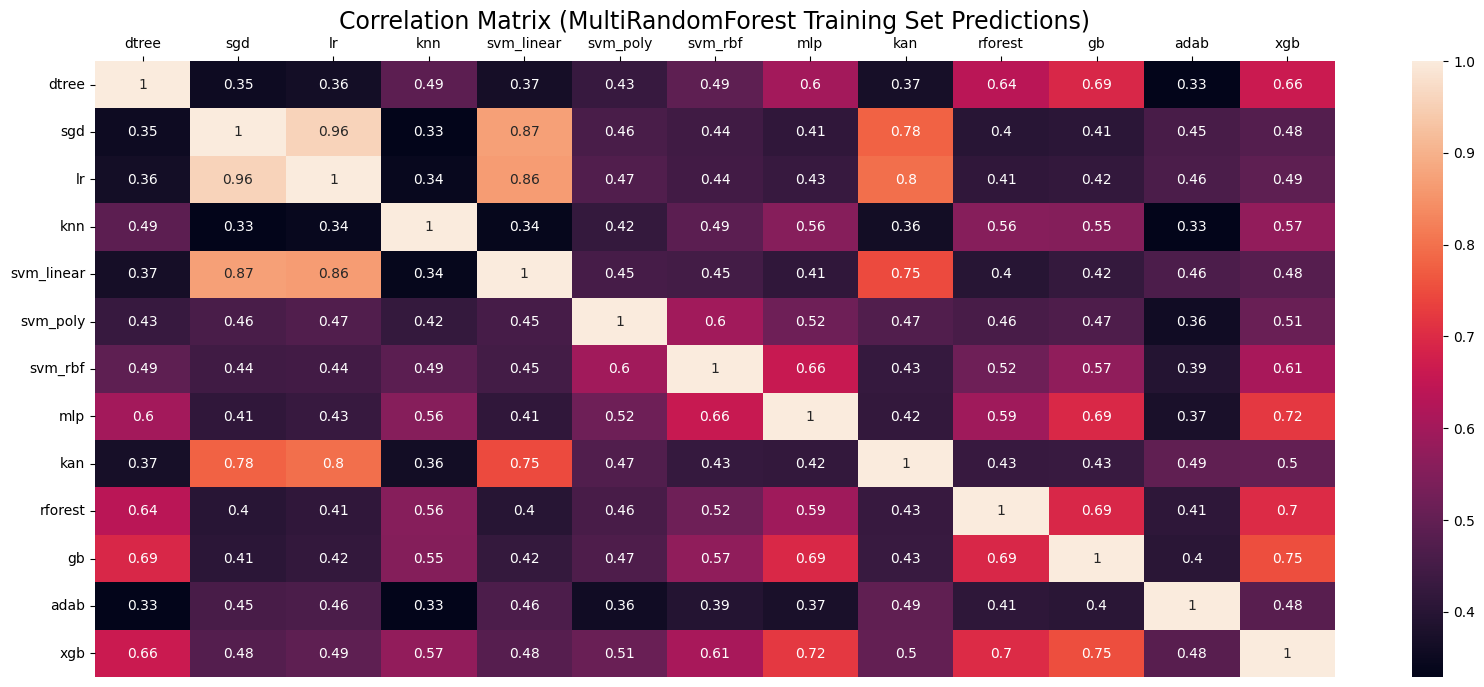

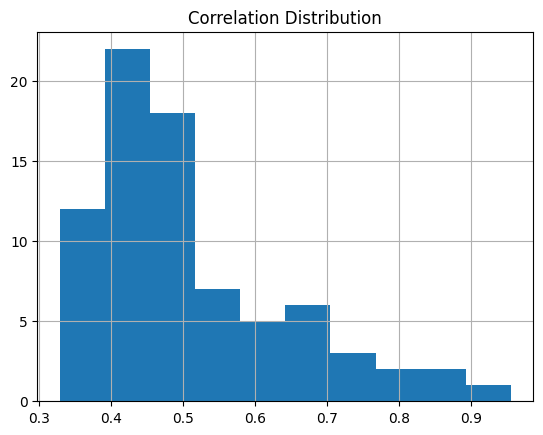

Training correlation distribution:
count    78.000000
mean      0.507130
std       0.140522
min       0.328708
25%       0.414629
50%       0.465506
75%       0.573569
max       0.955567
Name: corr, dtype: float64


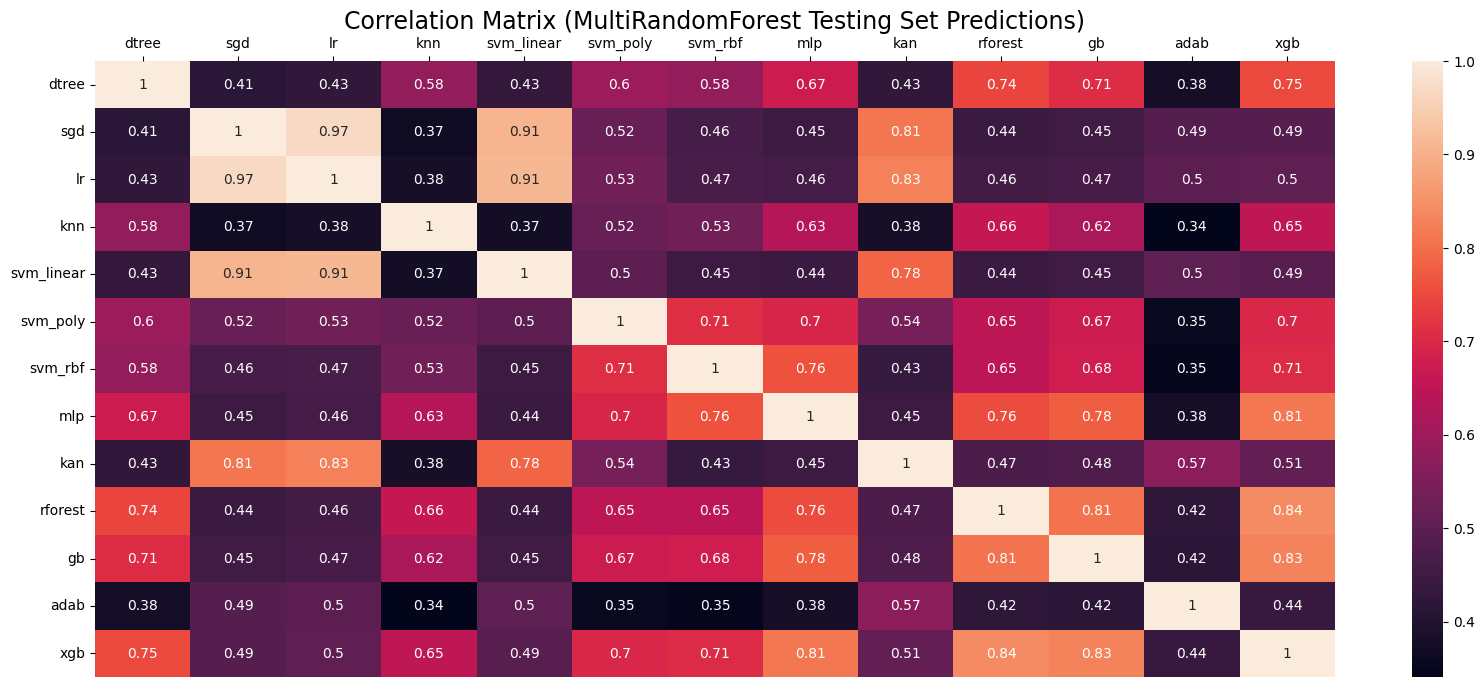

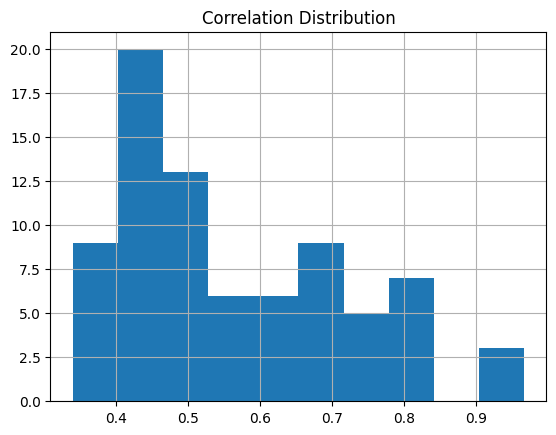

Testing correlation distribution:
count    78.000000
mean      0.566318
std       0.158473
min       0.340736
25%       0.443978
50%       0.506745
75%       0.691295
max       0.966598
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0314
NMSE: 0.1384
MAE: 0.9233
NMAE: 1.0549
aRRMSE: 0.8772
aCC: 0.8499


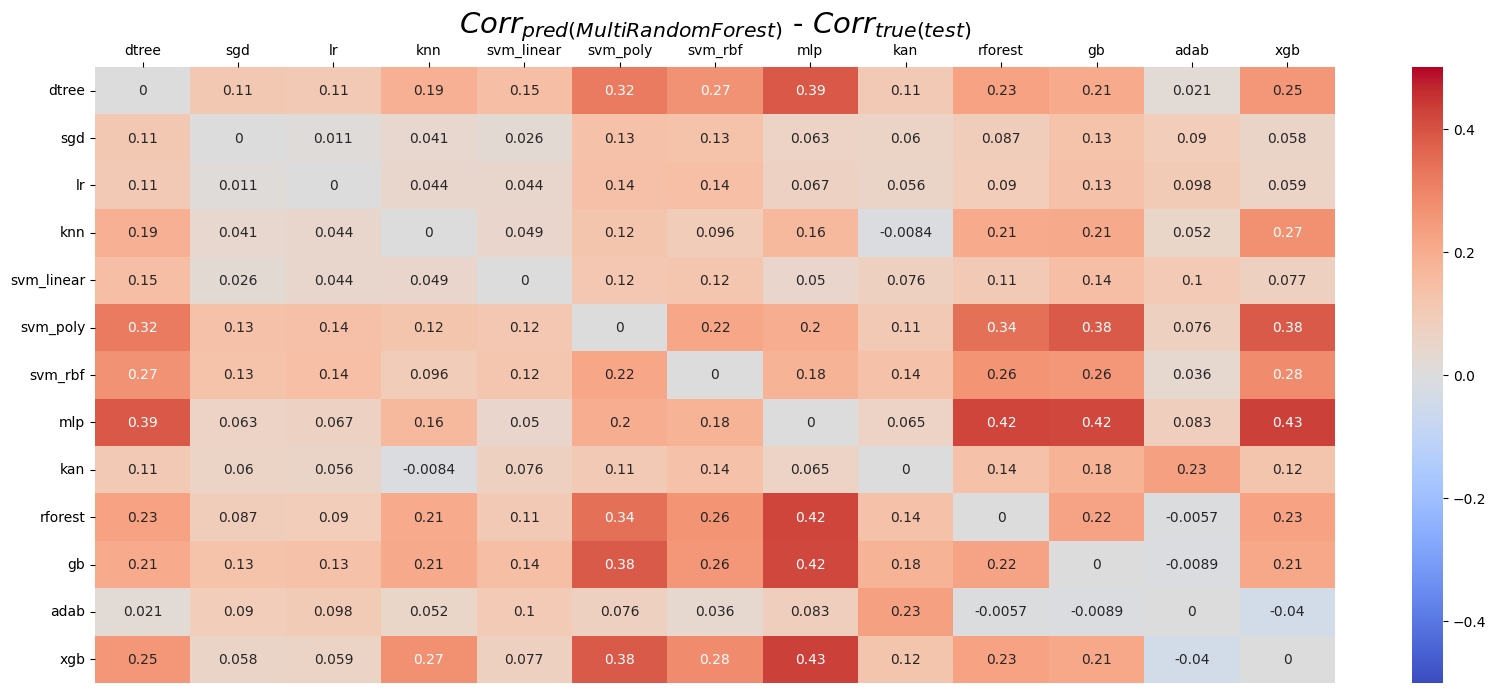

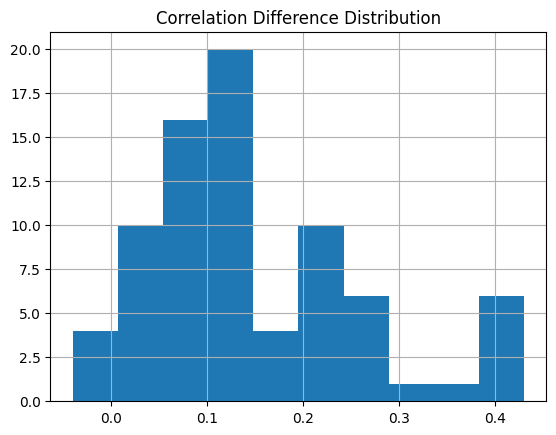

In [49]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [50]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.031352
MAE       0.138443
NMSE      0.923295
NMAE      1.054856
aRRMSE    0.877241
aCC       0.849872
Name: MRT, dtype: object

In [51]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['rforest', 'mlp', 'gb', 'dtree', 'svm_rbf', 'svm_poly', 'xgb'],
 ['rforest', 'mlp', 'gb', 'dtree', 'knn', 'xgb'],
 ['sgd', 'lr', 'kan', 'svm_linear'],
 ['adab', 'kan']]

### Multi-Output SVR

In [ ]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

{'C': 1, 'gamma': 'auto'}


In [ ]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

[I 2025-05-09 18:22:52,268] A new study created in memory with name: no-name-ead237f8-ba78-422b-b7e6-e84d3756c054
[I 2025-05-09 18:22:52,323] Trial 0 finished with value: -0.08585997173926715 and parameters: {'C': 0.75, 'gamma': 'scale', 'tol': 0.013388514723715328, 'degree': 4, 'epsilon': 0.5323980435298018}. Best is trial 0 with value: -0.08585997173926715.
[I 2025-05-09 18:22:52,369] Trial 1 finished with value: -0.08012206134239352 and parameters: {'C': 1.25, 'gamma': 'scale', 'tol': 0.08527568969979069, 'degree': 6, 'epsilon': 0.25403596876999807}. Best is trial 1 with value: -0.08012206134239352.
[I 2025-05-09 18:22:52,417] Trial 2 finished with value: -0.07857961892137474 and parameters: {'C': 1.75, 'gamma': 'scale', 'tol': 0.04523580644687323, 'degree': 2, 'epsilon': 0.13231750271315915}. Best is trial 2 with value: -0.07857961892137474.
[I 2025-05-09 18:22:52,454] Trial 3 finished with value: -0.08191907919828587 and parameters: {'C': 1.75, 'gamma': 'auto', 'tol': 0.2196930350

FrozenTrial(number=151, state=1, values=[-0.07843179983465308], datetime_start=datetime.datetime(2025, 5, 9, 18, 22, 59, 551119), datetime_complete=datetime.datetime(2025, 5, 9, 18, 22, 59, 597645), params={'C': 2.25, 'gamma': 'scale', 'tol': 0.0023733109529851444, 'degree': 7, 'epsilon': 0.1000217763075082}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': CategoricalDistribution(choices=(0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75)), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'tol': FloatDistribution(high=0.5, log=True, low=0.001, step=None), 'degree': IntDistribution(high=8, log=False, low=2, step=1), 'epsilon': FloatDistribution(high=0.8, log=True, low=0.1, step=None)}, trial_id=151, value=None)


In [52]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [53]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0502
NMSE: 1.0641
MAE: 0.1544
NMAE: 0.8576
aRRMSE: 0.8867
aCC: 0.6848

[TESTING SET]
MSE: 0.0838
NMSE: 2.9872
MAE: 0.1966
NMAE: 1.1318
aRRMSE: 1.3023
aCC: 0.2901


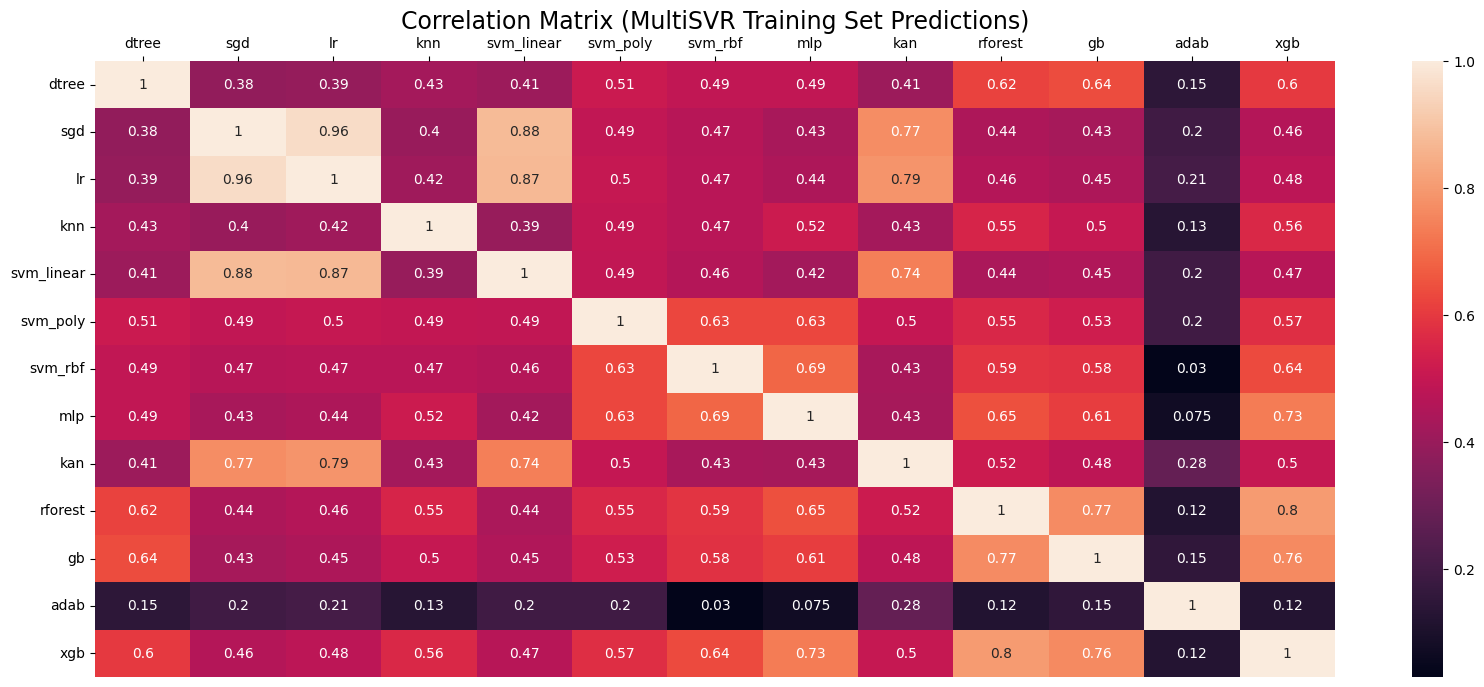

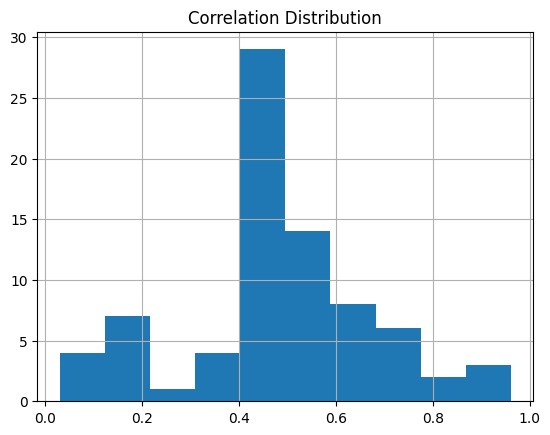

Training correlation distribution:
count    78.000000
mean      0.484578
std       0.189859
min       0.030484
25%       0.423198
50%       0.479472
75%       0.586725
max       0.960771
Name: corr, dtype: float64


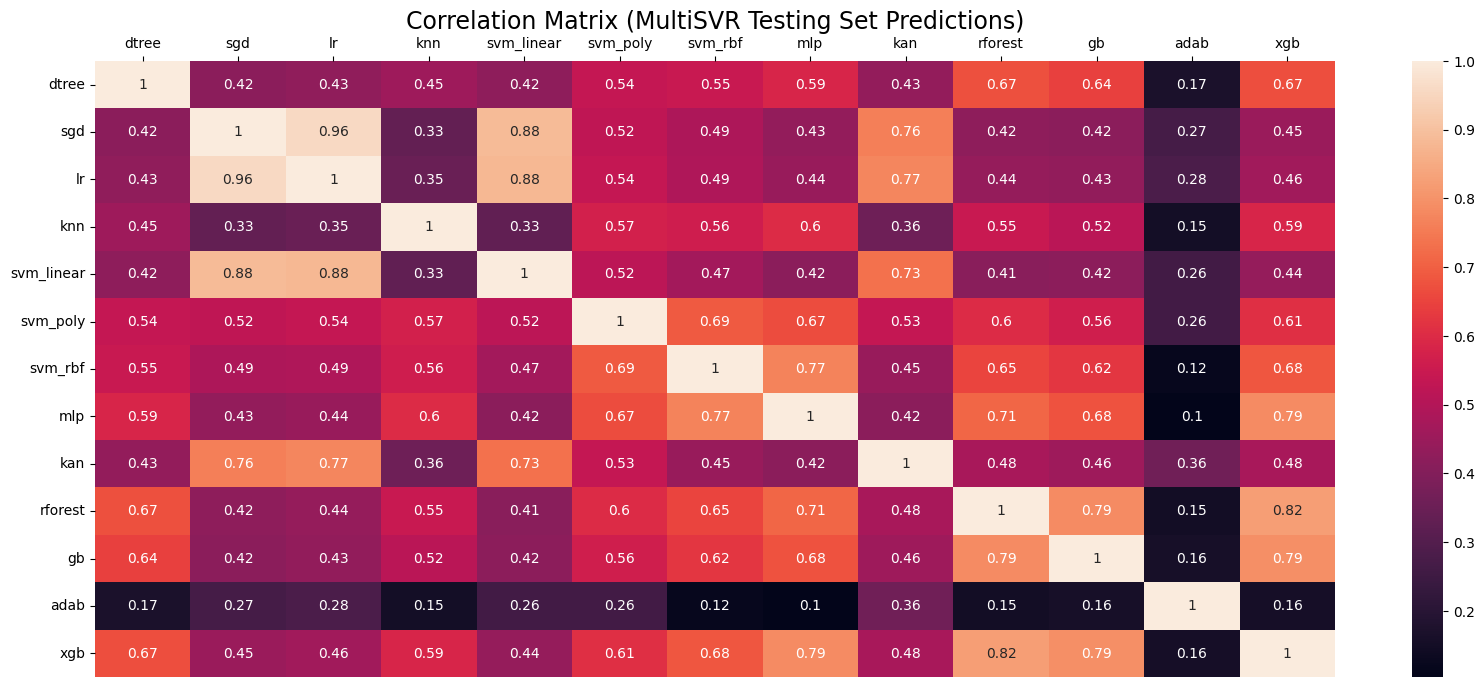

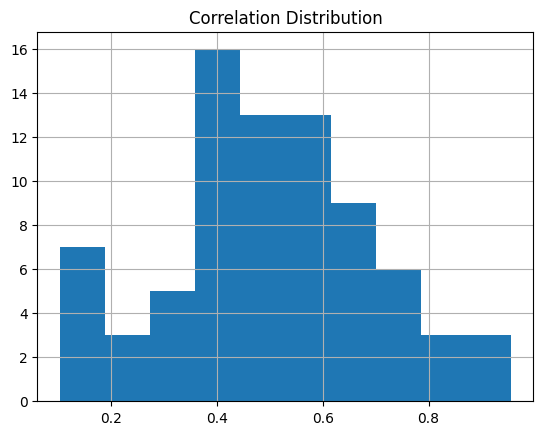

Testing correlation distribution:
count    78.000000
mean      0.505548
std       0.190801
min       0.103930
25%       0.417677
50%       0.483277
75%       0.639192
max       0.955672
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0265
NMSE: 0.1286
MAE: 0.7833
NMAE: 1.0021
aRRMSE: 0.8167
aCC: 0.8304


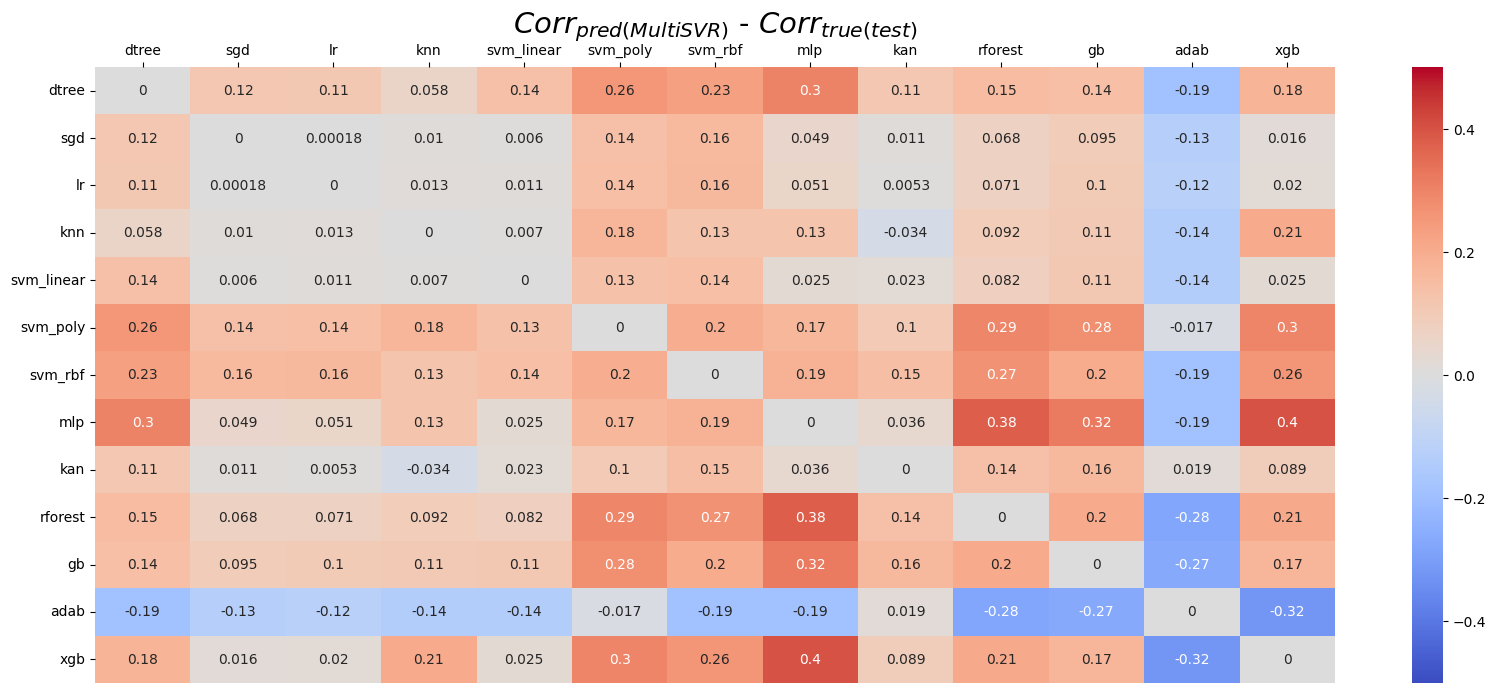

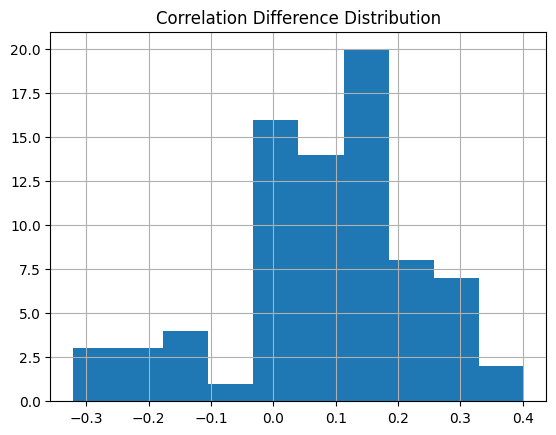

In [54]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [56]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.026454
MAE       0.128632
NMSE      0.783253
NMAE      1.002141
aRRMSE    0.816746
aCC       0.830393
Name: M-SVR, dtype: object

In [ ]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['mlp', 'knn', 'svm_rbf', 'svm_poly', 'xgb'],
 ['rforest', 'mlp', 'gb', 'dtree', 'xgb'],
 ['rforest', 'mlp', 'gb', 'svm_rbf', 'svm_poly', 'xgb'],
 ['sgd', 'lr', 'kan', 'svm_linear'],
 ['adab']]

### Multi-Output Regressor 
(ST)

In [ ]:
#mtr_params = getAssrParams(RandomForestRegressor, parameters, seed, False, 'estimator')
#
##mor = MultiOutputRegressor(RandomForestRegressor(random_state=seed), n_jobs=-1).fit(Xa_train, ya_train)
#g_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor()), mtr_params, n_jobs=-1, verbose=True, scoring="neg_mean_absolute_error").fit(Xa_train, ya_train)
#print(g_search.best_params_)
#mor = g_search.best_estimator_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
{'estimator': RandomForestRegressor(criterion='poisson', max_depth=20, min_samples_leaf=2,
                      n_estimators=150, random_state=2133330296)}


In [ ]:
#study = OptunaStudy(Xa_train, ya_train, 100)
#study.search(MultiOutputRegressor)

[I 2025-05-09 18:36:57,229] A new study created in memory with name: no-name-38a3a363-e47a-47c9-a74a-73195cc7f64b
[I 2025-05-09 18:37:02,874] Trial 0 finished with value: -0.075815474467692 and parameters: {'n_estimators': 88, 'criterion': 'squared_error', 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.075815474467692.
[I 2025-05-09 18:37:06,884] Trial 1 finished with value: -0.07623521039889687 and parameters: {'n_estimators': 80, 'criterion': 'squared_error', 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.075815474467692.
[I 2025-05-09 18:37:11,548] Trial 2 finished with value: -0.07593017751504347 and parameters: {'n_estimators': 111, 'criterion': 'friedman_mse', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.075815474467692.
[I 2025-05-09 18:37:15,703] Trial 3 finished with value: -0.07492209791656365 and parameters: {'n_estimators': 

FrozenTrial(number=63, state=1, values=[-0.07321767440565749], datetime_start=datetime.datetime(2025, 5, 9, 18, 41, 6, 459407), datetime_complete=datetime.datetime(2025, 5, 9, 18, 41, 9, 188289), params={'n_estimators': 83, 'criterion': 'poisson', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=160, log=True, low=80, step=1), 'criterion': CategoricalDistribution(choices=('squared_error', 'poisson', 'friedman_mse')), 'max_depth': IntDistribution(high=35, log=True, low=10, step=1), 'min_samples_split': IntDistribution(high=50, log=True, low=2, step=1), 'min_samples_leaf': IntDistribution(high=16, log=True, low=1, step=1)}, trial_id=63, value=None)


In [58]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

In [59]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0102
NMSE: 0.1150
MAE: 0.0647
NMAE: 0.2880
aRRMSE: 0.3387
aCC: 0.9683

[TESTING SET]
MSE: 0.0761
NMSE: 0.8529
MAE: 0.1757
NMAE: 0.7827
aRRMSE: 0.9231
aCC: 0.4022


#### Análise das correlações

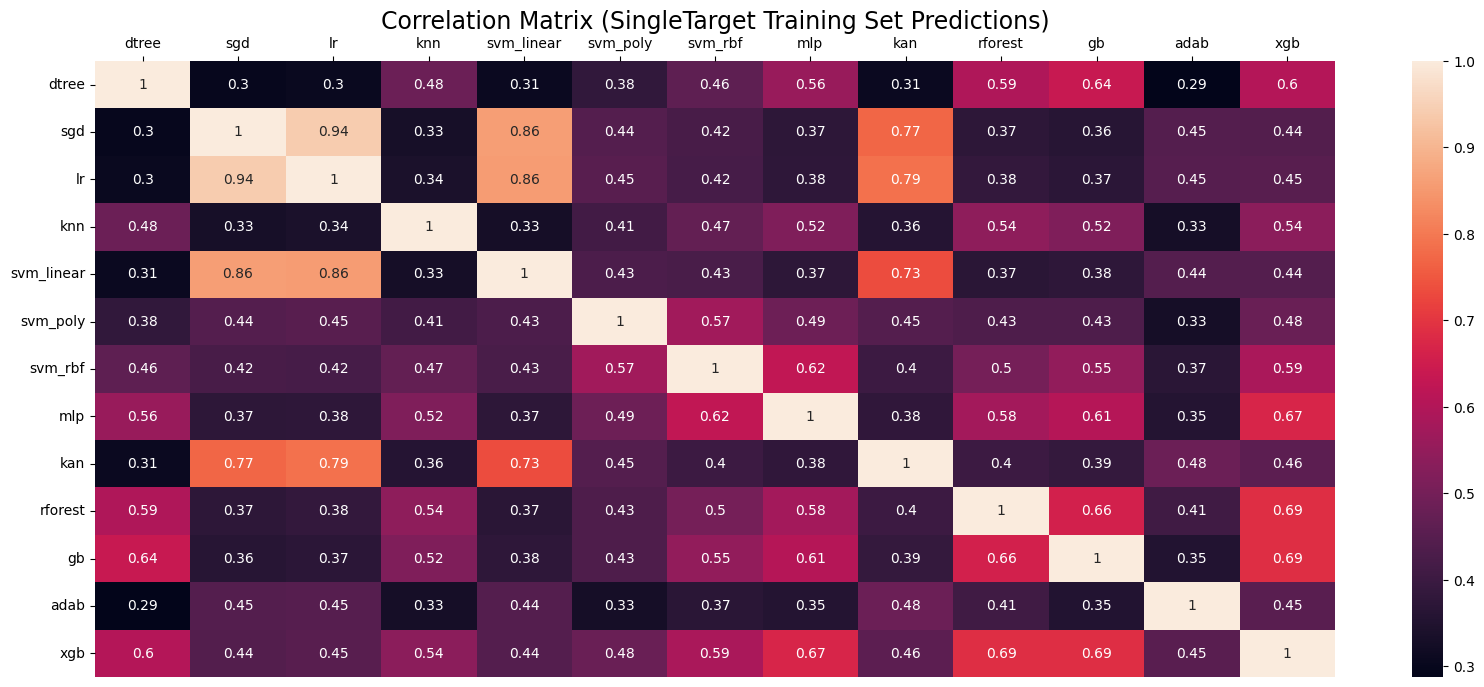

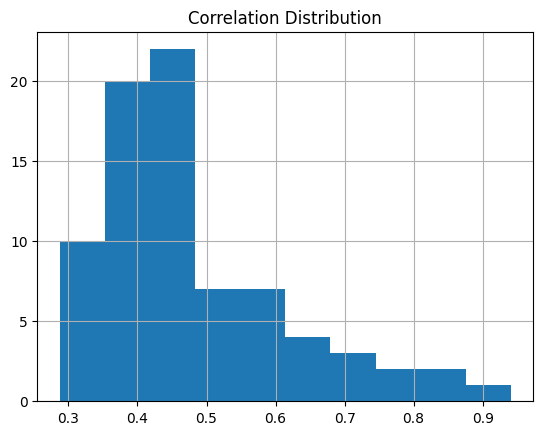

Training correlation distribution:
count    78.000000
mean      0.477489
std       0.141969
min       0.287613
25%       0.373474
50%       0.444977
75%       0.547128
max       0.940811
Name: corr, dtype: float64


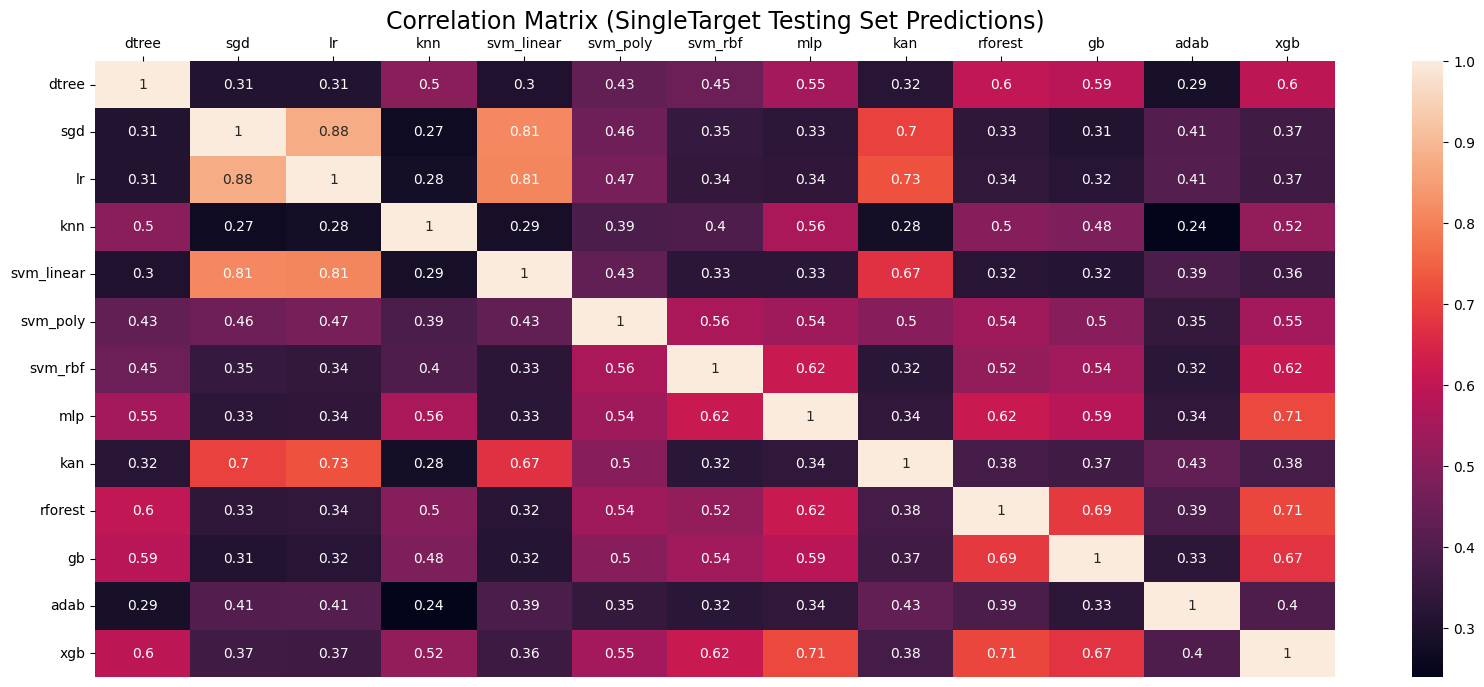

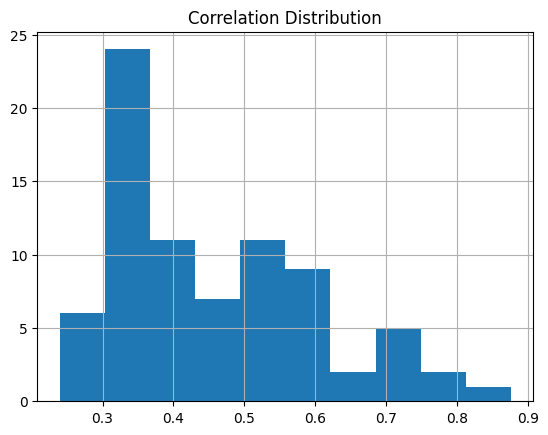

Testing correlation distribution:
count    78.000000
mean      0.454653
std       0.148823
min       0.239815
25%       0.331823
50%       0.401365
75%       0.549102
max       0.876157
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0096
NMSE: 0.0693
MAE: 0.2884
NMAE: 0.5344
aRRMSE: 0.4804
aCC: 0.9062


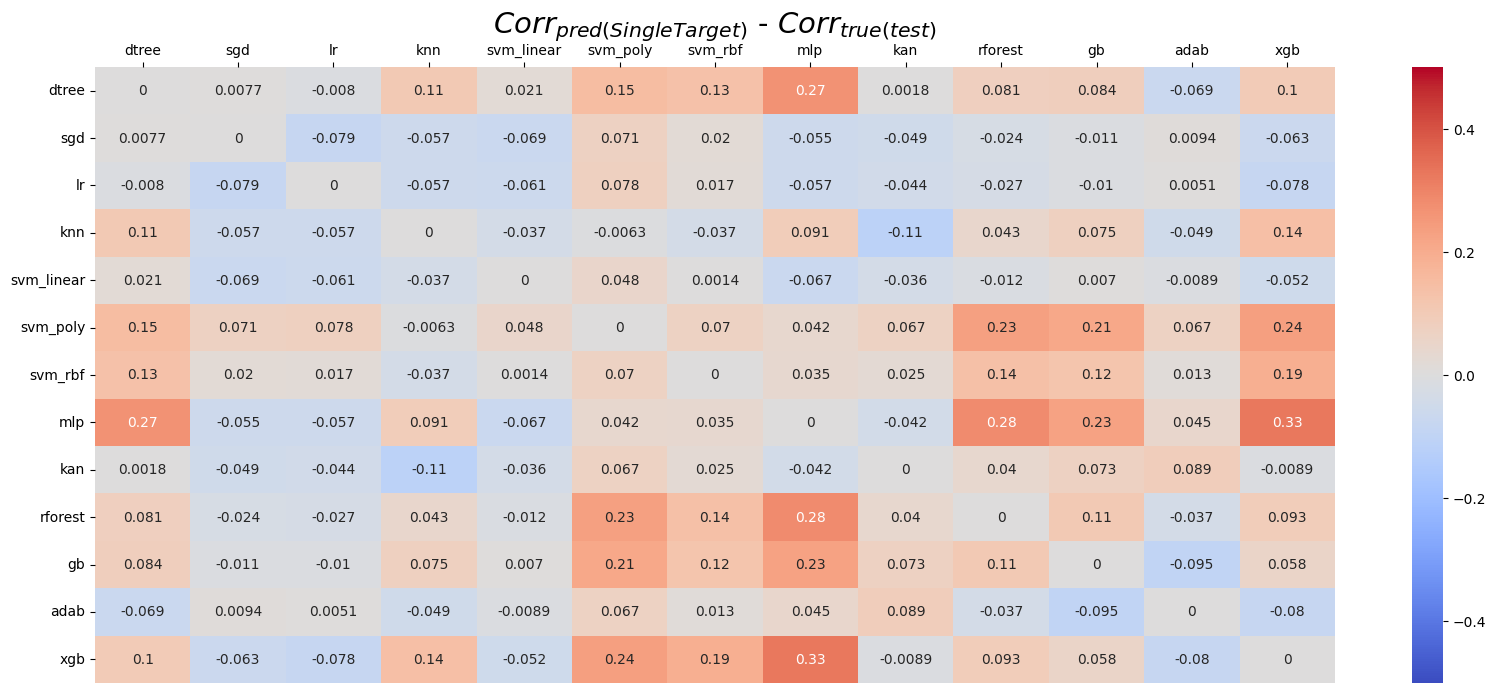

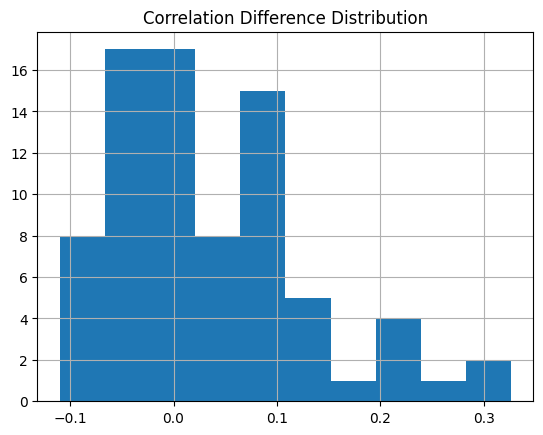

In [61]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [62]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE       0.009633
MAE       0.069305
NMSE      0.288351
NMAE      0.534378
aRRMSE    0.480373
aCC       0.906236
Name: ST, dtype: object

In [63]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['mlp', 'knn'],
 ['mlp', 'svm_rbf', 'xgb'],
 ['xgb', 'mlp', 'rforest', 'gb'],
 ['sgd', 'lr', 'kan', 'svm_linear'],
 ['dtree', 'rforest', 'gb', 'xgb'],
 ['adab'],
 ['svm_rbf', 'svm_poly']]

## Grupais

In [ ]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [181]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['gb', 'rforest', 'xgb']
total: 0.5817415992088912

['mlp', 'svm_rbf']
total: 0.5947277010138178

['sgd', 'lr', 'kan', 'svm_linear']
total: 0.8209263002603433



### Regressor Chain

In [ ]:
#[RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
#                random_state=seed,
#                order='random', cv=5) for _ in range(num_chains)]

rcg = GroupedAssessor([RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                                      random_state=seed,
                                      order='random', 
                                      cv=5) for _ in range(num_chains)])

rcg.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0170
NMSE: 0.1972
MAE: 0.0845
NMAE: 0.3730
aRRMSE: 0.4243
aCC: 0.9323

[TESTING SET]
MSE: 0.0778
NMSE: 0.8706
MAE: 0.1850
NMAE: 0.8210
aRRMSE: 0.9324
aCC: 0.4019


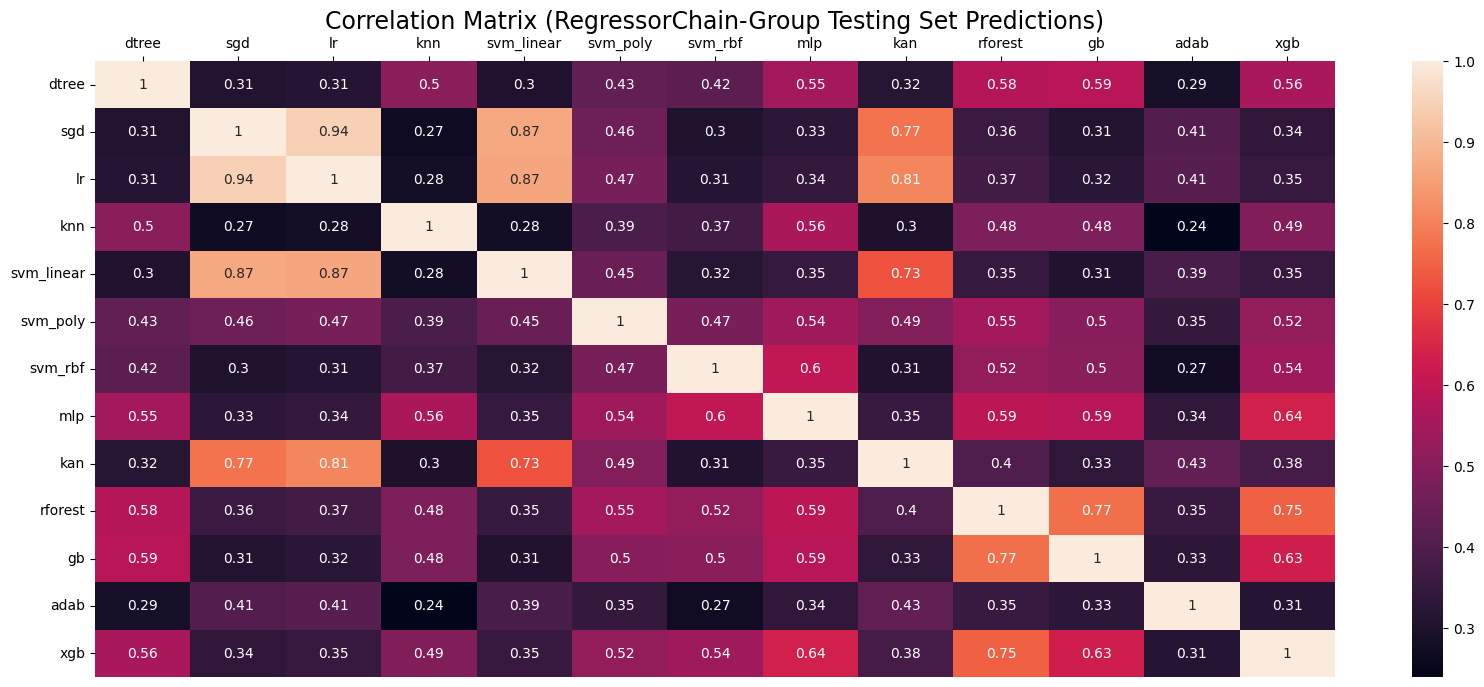

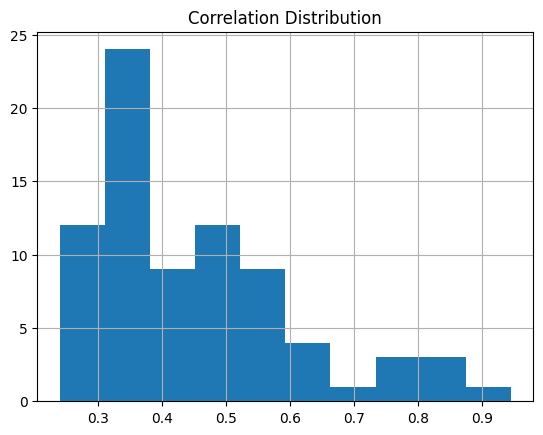

Testing correlation distribution:
count    78.000000
mean      0.451814
std       0.160194
min       0.239815
25%       0.330134
50%       0.401240
75%       0.540571
max       0.944377
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0086
NMSE: 0.0635
MAE: 0.2579
NMAE: 0.4988
aRRMSE: 0.4523
aCC: 0.9119


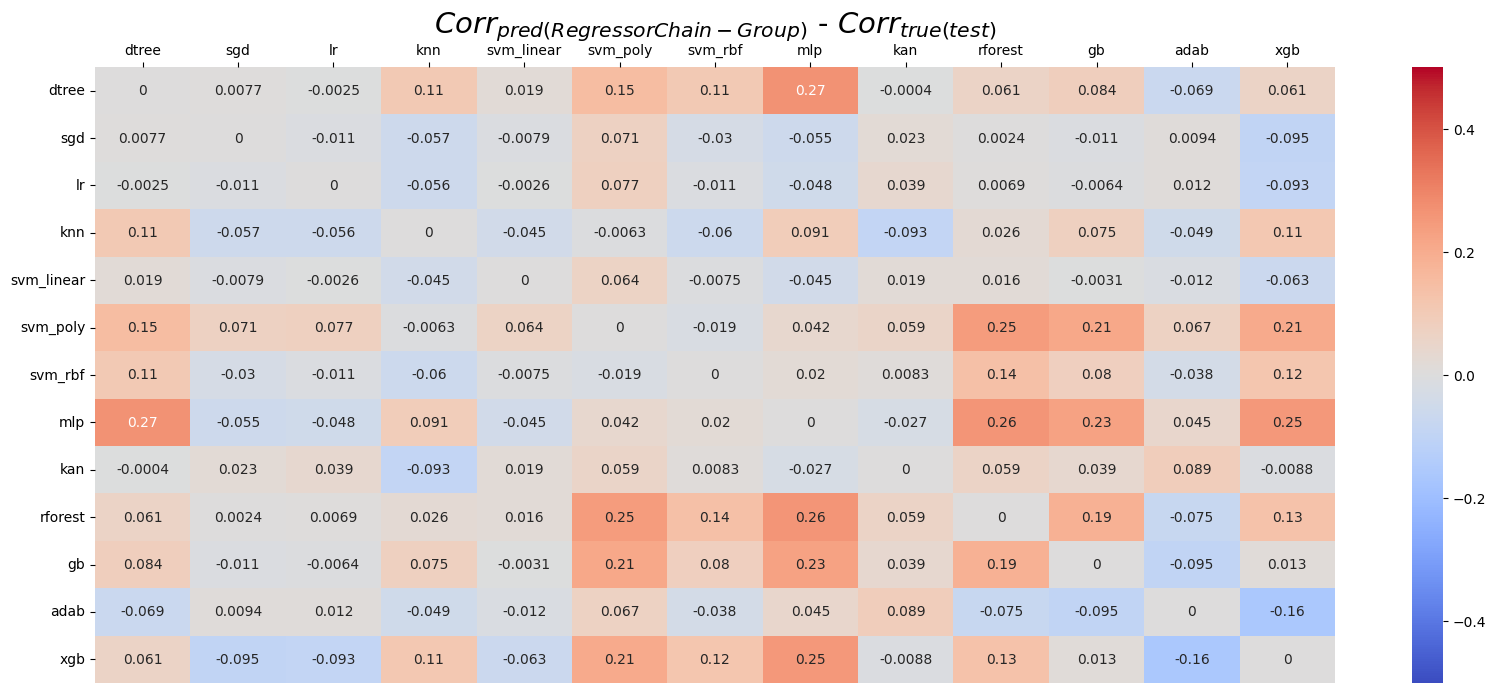

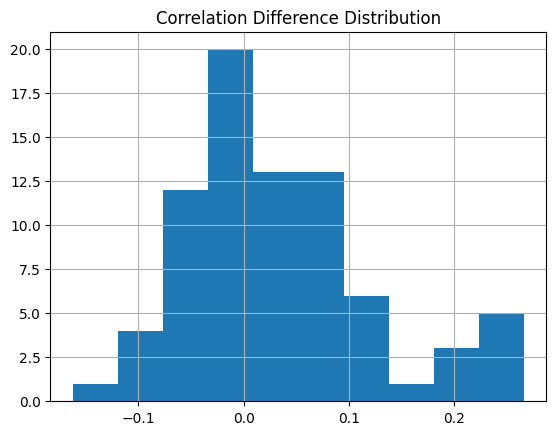

[['svm_poly', 'rforest'], ['dtree', 'gb', 'rforest', 'xgb'], ['mlp', 'gb', 'rforest', 'xgb'], ['sgd', 'lr', 'kan', 'svm_linear'], ['mlp', 'knn'], ['mlp', 'svm_rbf'], ['adab']]


In [ ]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [102]:
results

{'results': [0.008596206876696627,
  0.06354168213807018,
  0.2578871131778204,
  0.4988025950631413,
  0.4522592588960327,
  0.9119385776127162],
 'groups': {'test': [['svm_poly', 'rforest'],
   ['dtree', 'gb', 'rforest', 'xgb'],
   ['mlp', 'gb', 'rforest', 'xgb'],
   ['sgd', 'lr', 'kan', 'svm_linear'],
   ['mlp', 'knn'],
   ['mlp', 'svm_rbf'],
   ['adab']]}}

### Ensemble of Regressor Chains

In [ ]:
#rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
#rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), 
#        random_state=seed, order='random', cv=5)

#rcg_plus = GroupedAssessor(VotingRegressor, model_names, random_state=seed,
#                           estimators=rc_ests, n_jobs=-1)

rcg_ac = f'RC[{num_chains}](g)'

rcg_plus = GroupedAssessor([GroupedAssessor([RegressorChain(
                                                base_estimator=RandomForestRegressor(random_state=seed),
                                                random_state=seed+i,
                                                order='random', cv=5) for i in range(num_chains)]
                                            ) for _ in range(len(groups['true_assessor_train']))])

rcg_plus.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

In [ ]:
# keeping the concat because multiple numbers of chains could be recorded
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

### Multi-Output SVR

In [ ]:
msvrg = GroupedAssessor([MSVR() for _ in range(len(groups['true_assessor_train']))])

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0537
NMSE: 1.0717
MAE: 0.1646
NMAE: 0.8942
aRRMSE: 0.9089
aCC: 0.6604

[TESTING SET]
MSE: 0.0849
NMSE: 2.9803
MAE: 0.2027
NMAE: 1.1524
aRRMSE: 1.3092
aCC: 0.2722


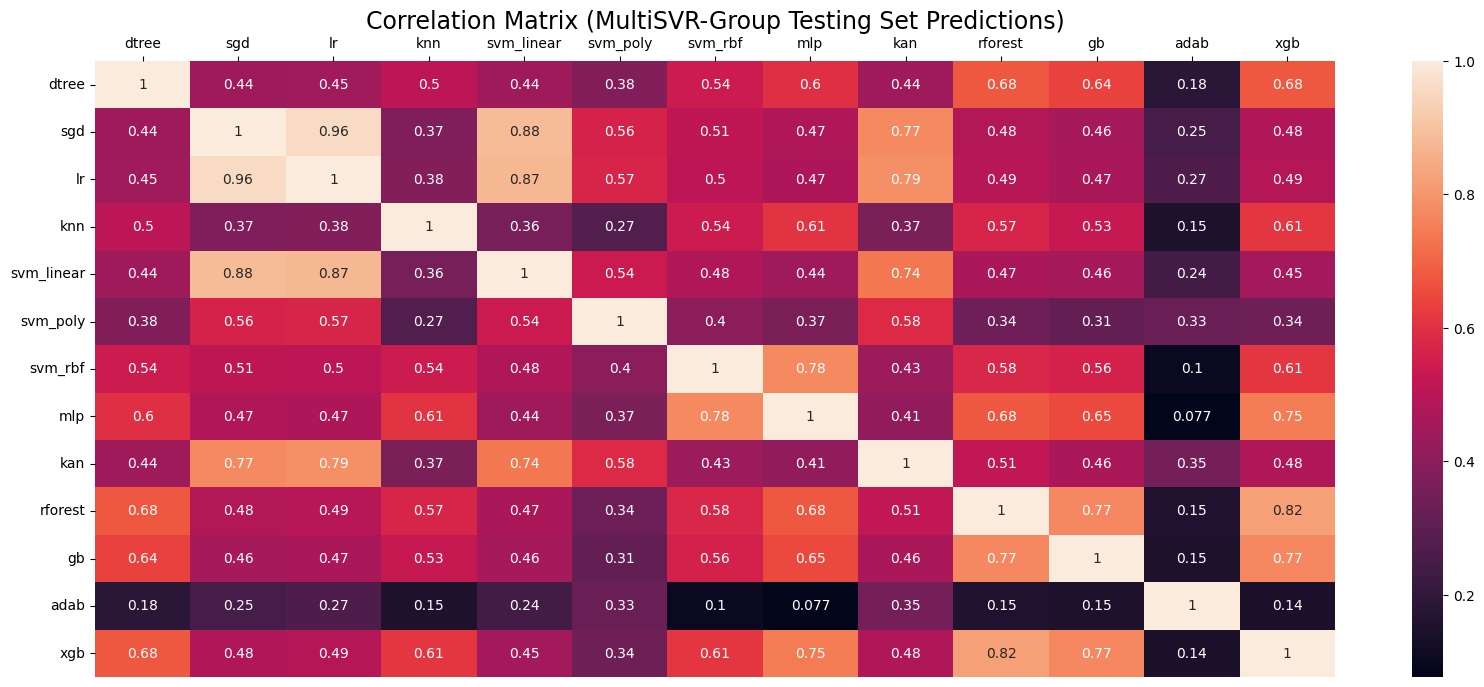

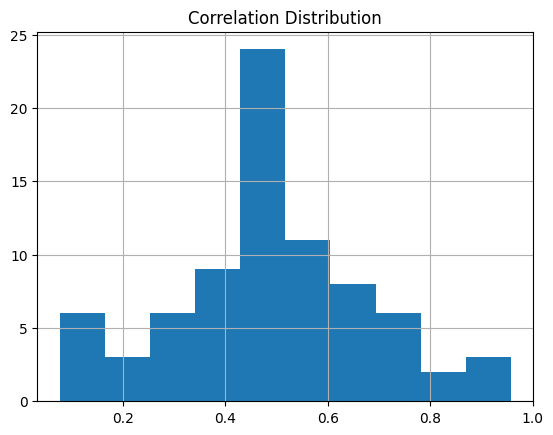

Testing correlation distribution:
count    78.000000
mean      0.489920
std       0.189730
min       0.077105
25%       0.373914
50%       0.477970
75%       0.593791
max       0.957100
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0231
NMSE: 0.1241
MAE: 0.6646
NMAE: 0.9461
aRRMSE: 0.7690
aCC: 0.8336


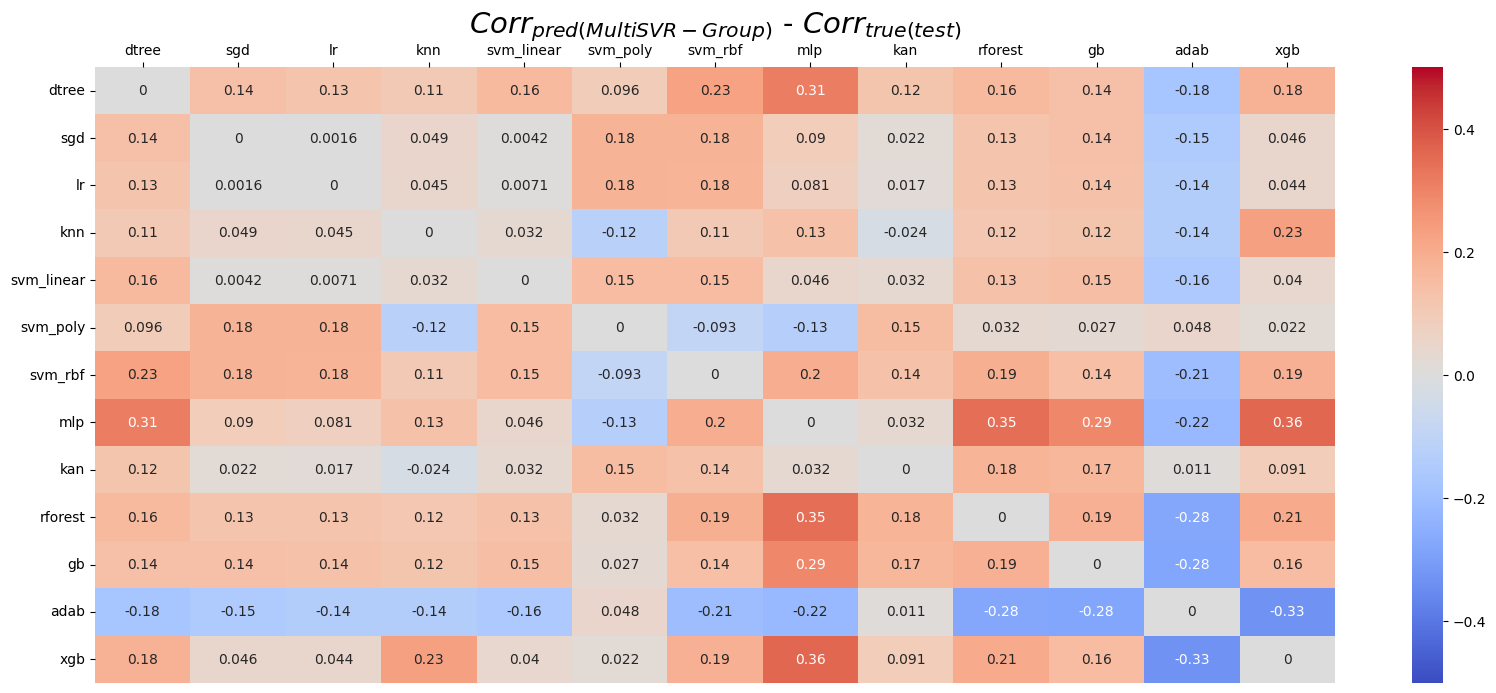

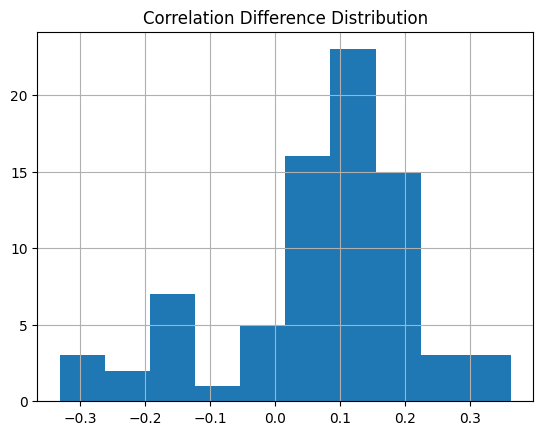

[['mlp', 'knn', 'rforest', 'xgb'], ['rforest', 'mlp', 'gb', 'dtree', 'xgb'], ['rforest', 'mlp', 'gb', 'svm_rbf', 'xgb'], ['kan', 'sgd', 'svm_poly', 'lr'], ['sgd', 'lr', 'kan', 'svm_linear'], ['adab']]


In [105]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [ ]:
mrfg = GroupedAssessor([RandomForestRegressor(random_state=seed) for _ in range(len(groups['true_assessor_train']))])

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'])

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[TRAINING SET]
MSE: 0.0102
NMSE: 0.1146
MAE: 0.0648
NMAE: 0.2882
aRRMSE: 0.3380
aCC: 0.9686

[TESTING SET]
MSE: 0.0759
NMSE: 0.8492
MAE: 0.1752
NMAE: 0.7804
aRRMSE: 0.9212
aCC: 0.4046


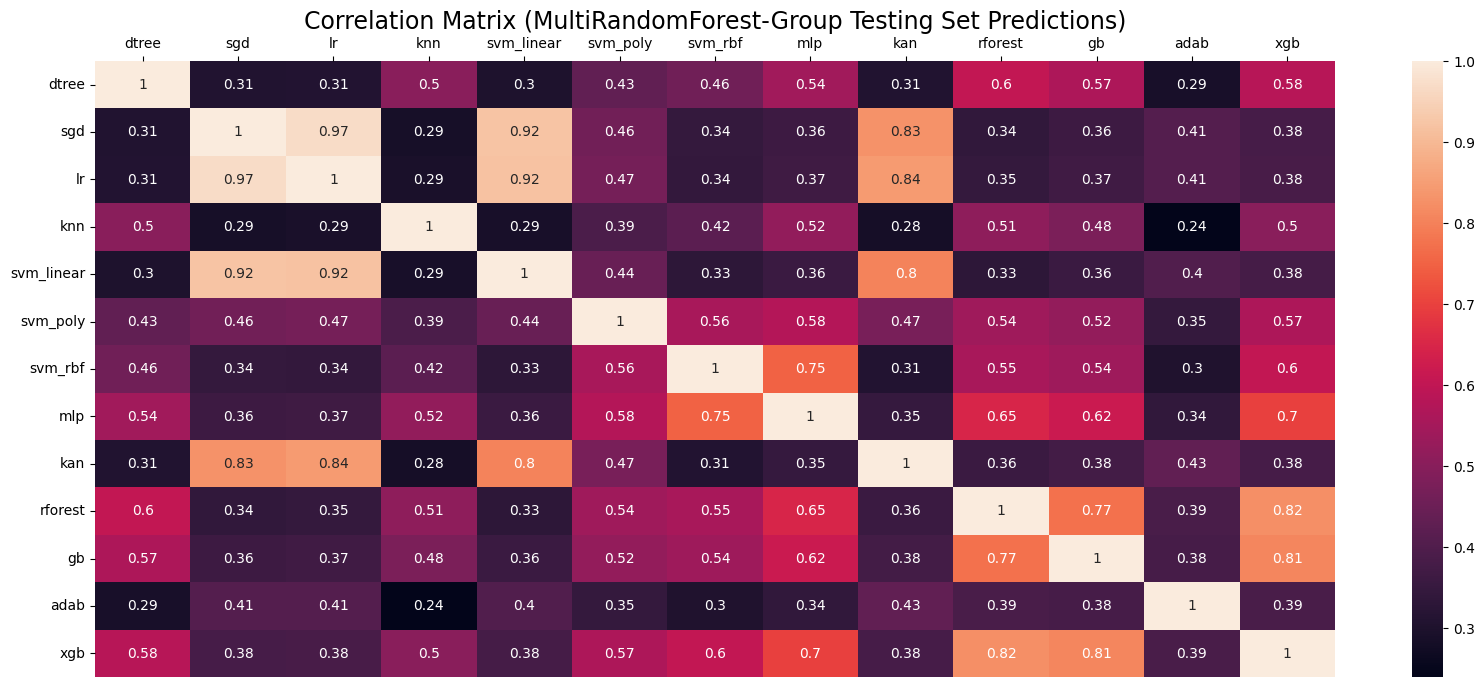

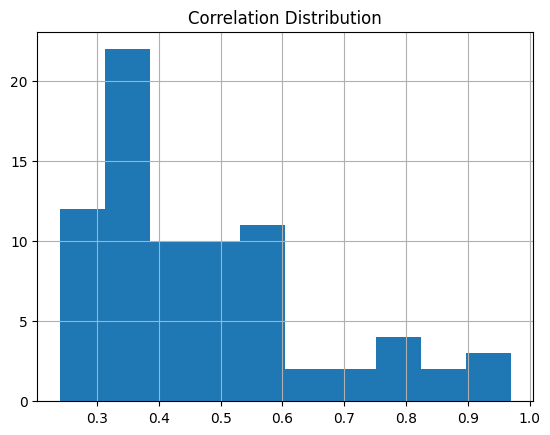

Testing correlation distribution:
count    78.000000
mean      0.474640
std       0.175296
min       0.239815
25%       0.346645
50%       0.407452
75%       0.556814
max       0.969496
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0113
NMSE: 0.0732
MAE: 0.3404
NMAE: 0.5658
aRRMSE: 0.5122
aCC: 0.9062


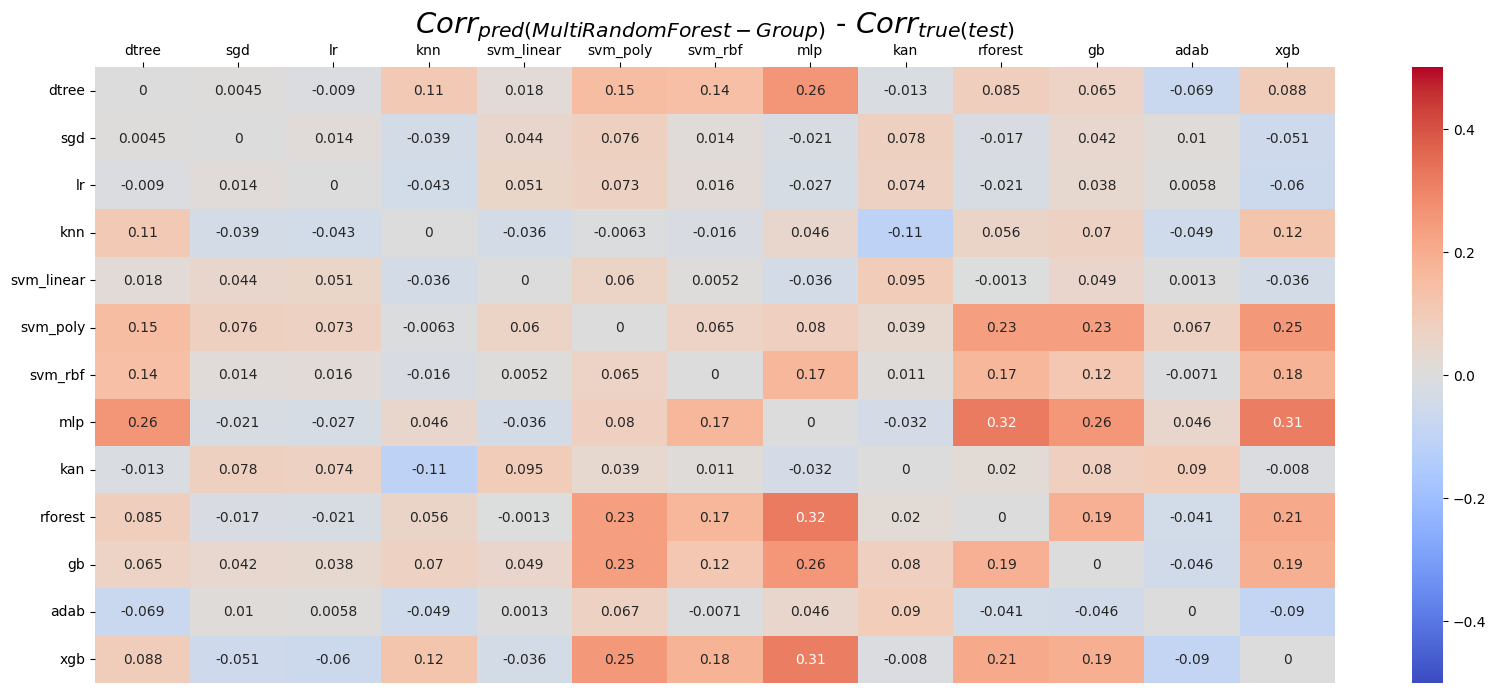

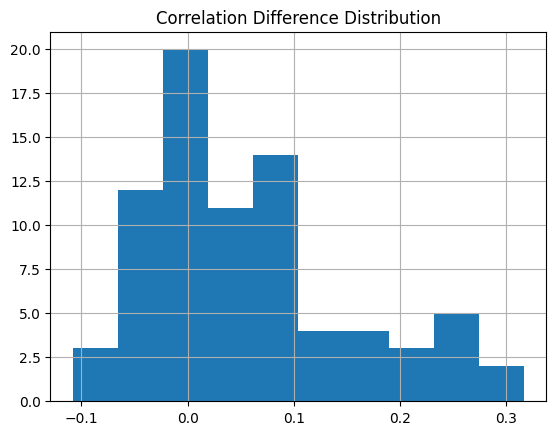

[['sgd', 'lr', 'kan', 'svm_linear'], ['mlp', 'svm_rbf', 'svm_poly', 'xgb'], ['dtree', 'rforest', 'gb', 'xgb'], ['mlp', 'svm_rbf', 'rforest', 'xgb'], ['xgb', 'mlp', 'rforest', 'gb'], ['knn'], ['adab']]


In [107]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [ ]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

regchain_assessor_test(6) & true_assessor_test(6):
['gb', 'xgb', 'rforest']
Número de grupos em comum: 1


mrf_assessor_test(2) & true_assessor_test(6):
Número de grupos em comum: 0


msvr_assessor_test(4) & true_assessor_test(6):
Número de grupos em comum: 0


mor_assessor_test(9) & true_assessor_test(6):
Número de grupos em comum: 0


regchain_group_test(9) & true_assessor_test(6):
Número de grupos em comum: 0


msvr_group_test(7) & true_assessor_test(6):
Número de grupos em comum: 0


mrf_group_test(7) & true_assessor_test(6):
Número de grupos em comum: 0




## Análises

In [109]:
results_df = metrics_df.copy()
results_df = results_df.reset_index()

results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.153325  0.849345  0.287726  0.796725  0.921599   
1        ST         sgd  0.041294  0.805318  0.124518  0.701221  0.897395   
2        ST          lr  0.037319  0.808483  0.116097  0.695384  0.899157   
3        ST         knn  0.122224  0.898261  0.270177  0.878673  0.947766   
4        ST  svm_linear  0.042197  0.825686  0.122798  0.696288  0.908673   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.032466  0.824435  0.102386  0.715437  0.907984   
87    RC(g)     rforest  0.070478  0.858956  0.219478  0.960591  0.926799   
88    RC(g)          gb  0.138433  0.882543  0.257027  0.783275  0.939438   
89    RC(g)        adab  0.000258  0.826838  0.008307  0.837356  0.909306   
90    RC(g)         xgb  0.095387  0.873833  0.213429  0.818208   0.93479   

         aCC  
0     0.3973  
1   0.462458  
2   0.462045  
3   0.333111  
4   0.441369  
..       ...  
86  0.437141  
87  0.481603  
88  0.360295  
89  0.438088  
90  0.390474  

[91 rows x 8 columns]

In [189]:
diff_results = diff_metrics.reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff.csv')
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0        ST  0.009633  0.069305  0.288351  0.534378  0.480373  0.906236
1       MRT  0.031352  0.138443  0.923295  1.054856  0.877241  0.849872
2    MRT(g)  0.011314  0.073207  0.340409  0.565779  0.512166  0.906246
3     M-SVR  0.026454  0.128632  0.783253  1.002141  0.816746  0.830393
4  M-SVR(g)  0.023077   0.12412   0.66458  0.946051  0.769019   0.83357
5        RC   0.01179  0.081355  0.325962  0.602948  0.547532  0.889447
6     RC(g)  0.008596  0.063542  0.257887  0.498803  0.452259  0.911939

In [184]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table.csv')
win_table

MSE  MAE  NMSE  NMAE  aRRMSE   aCC
ST        1.0  1.0   3.0   3.0     1.0   0.0
MRT       4.0  4.0   5.0   5.0     4.0   0.0
MRT(g)    1.0  1.0   4.0   4.0     1.0   0.0
M-SVR     0.0  0.0   0.0   0.0     0.0   3.0
M-SVR(g)  0.0  0.0   0.0   0.0     0.0  10.0
RC        5.0  5.0   0.0   0.0     5.0   0.0
RC(g)     2.0  2.0   1.0   1.0     2.0   0.0

In [113]:
class_palette = sns.color_palette()[:7]

In [114]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results.csv')
summary

MSE                 MAE                NMSE            \
              mean       std      mean       std      mean       std   
Assessor                                                               
M-SVR     0.083778  0.050612   2.98724  7.346203  0.196581  0.084963   
M-SVR(g)  0.084884  0.050050  2.980325  7.245446  0.202732  0.086622   
MRT       0.075901  0.049500  0.850685  0.050111  0.176682  0.081121   
MRT(g)    0.075852  0.049003  0.849182  0.049508  0.175152  0.081601   
RC        0.075243  0.048316  0.845243  0.049416  0.181433  0.081257   
RC(g)     0.077839  0.049277  0.870554  0.066224  0.184954  0.085678   
ST        0.076083  0.049068  0.852921  0.053534  0.175721  0.081929   

              NMAE              aRRMSE                 aCC            
              mean       std      mean       std      mean       std  
Assessor                                                              
M-SVR     1.131789  0.990145  1.302304  1.182729  0.290108  0.051874  
M-SVR(g)  1.152427  0.952339  1.309197  1.171263   0.27217  0.059275  
MRT       0.792234  0.058614  0.921957  0.027131  0.399953  0.057004  
MRT(g)    0.780372  0.064613  0.921152  0.026757  0.404605  0.058249  
RC        0.812046  0.053864  0.919007  0.026933  0.401492  0.060064  
RC(g)     0.820989  0.103212  0.932431  0.034923  0.401903  0.059804  
ST        0.782719  0.065312  0.923122  0.028836  0.402173  0.059420

In [137]:
results_df_c = results_df.copy()

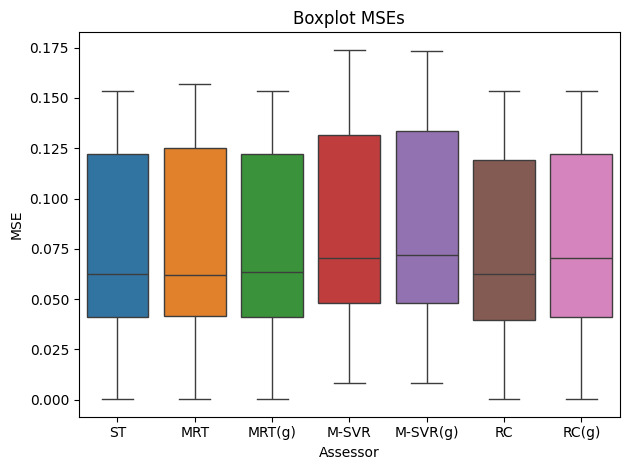

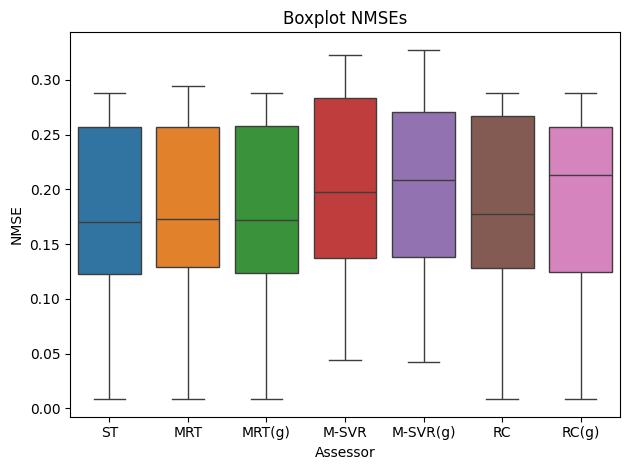

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


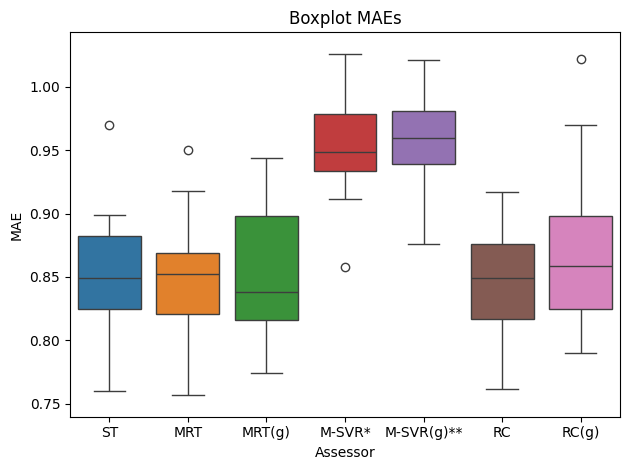

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


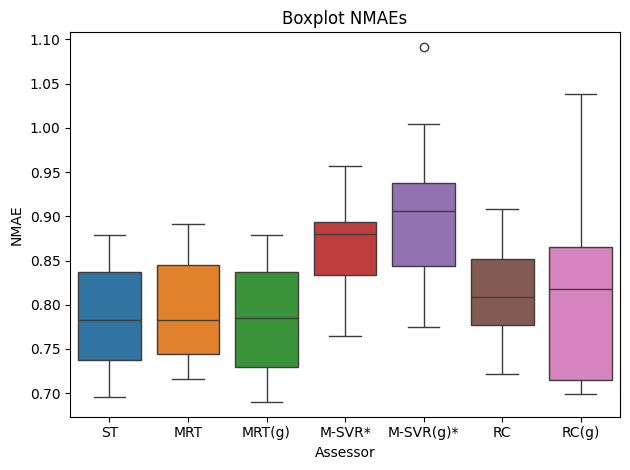

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


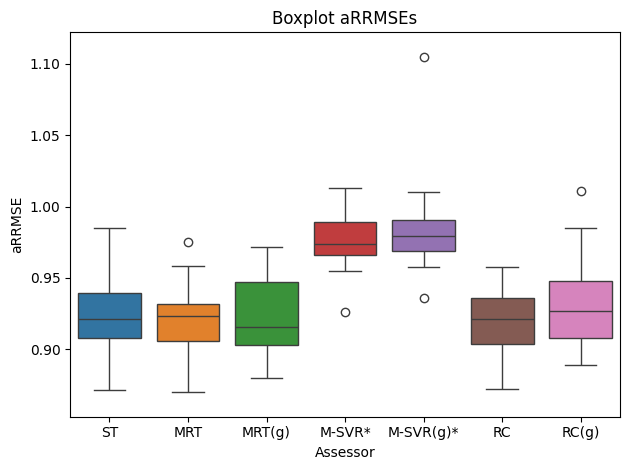

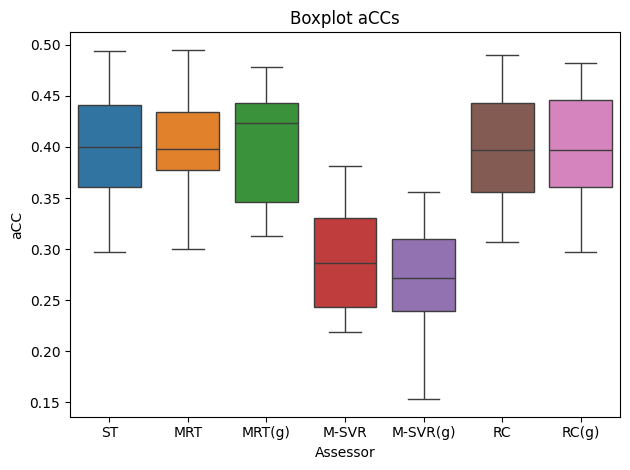

In [157]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

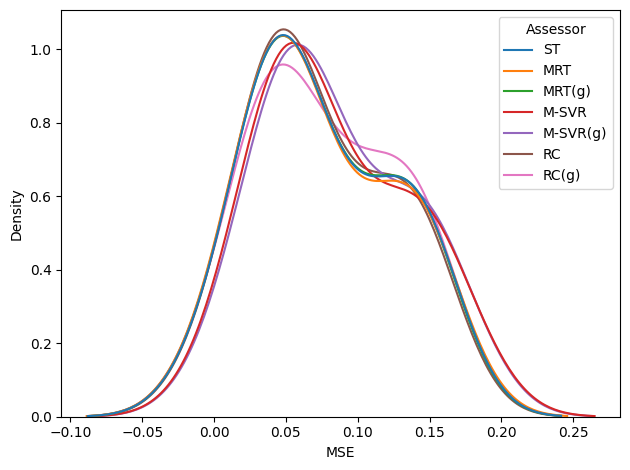

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


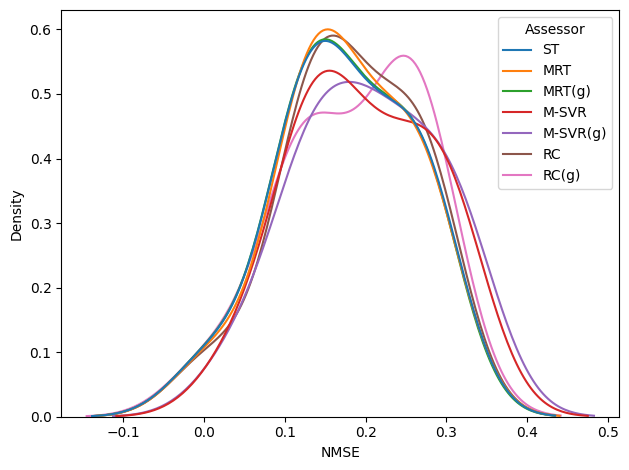

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


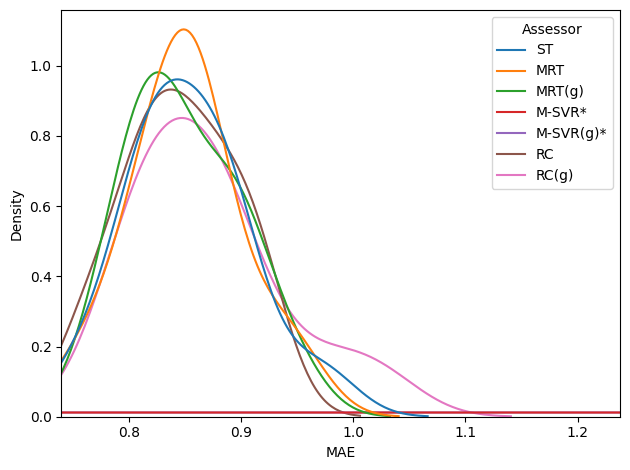

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


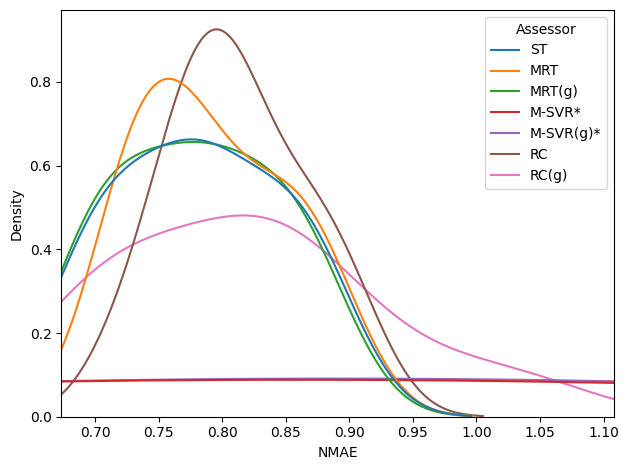

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


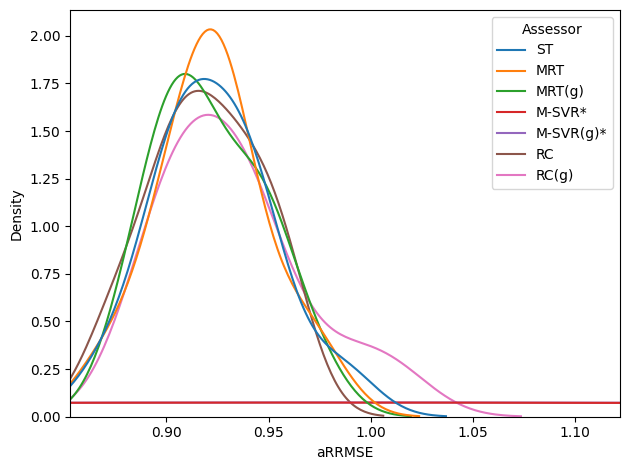

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


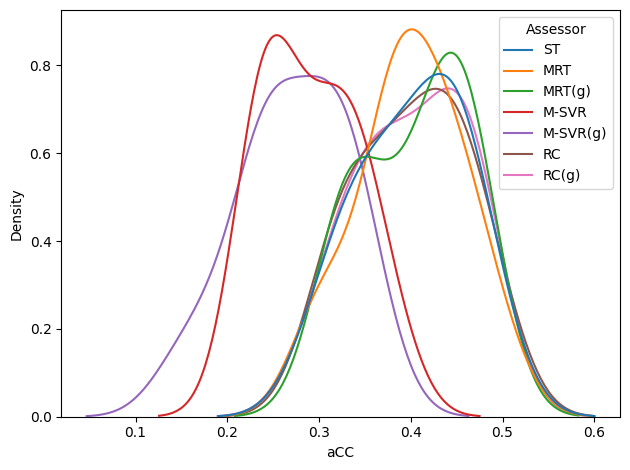

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

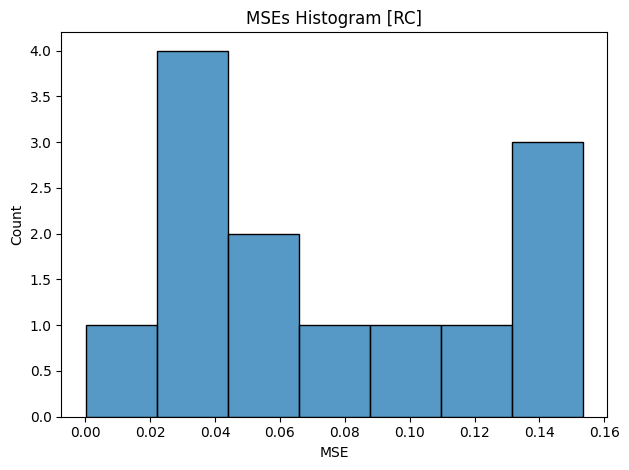

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


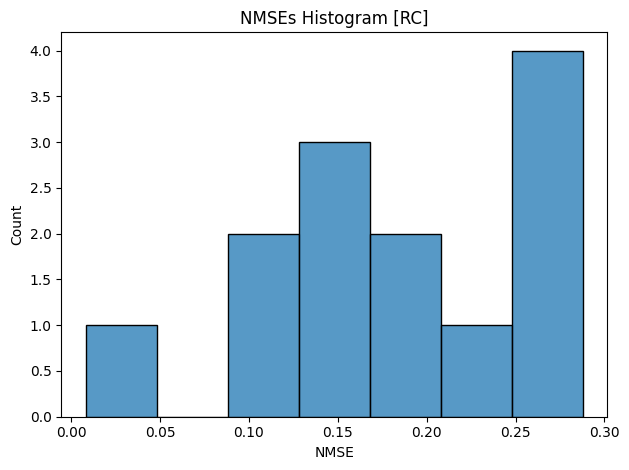

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


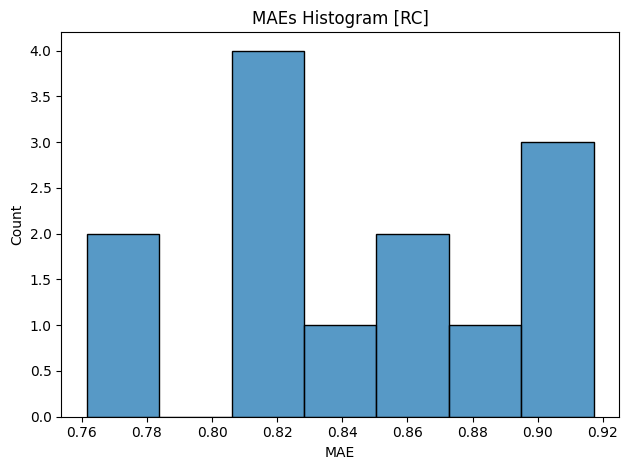

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


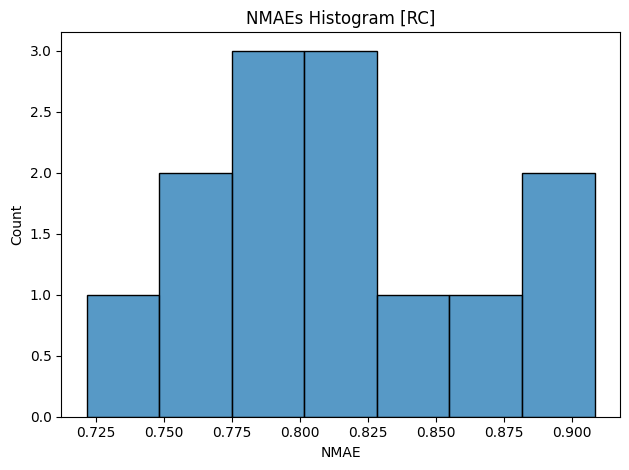

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


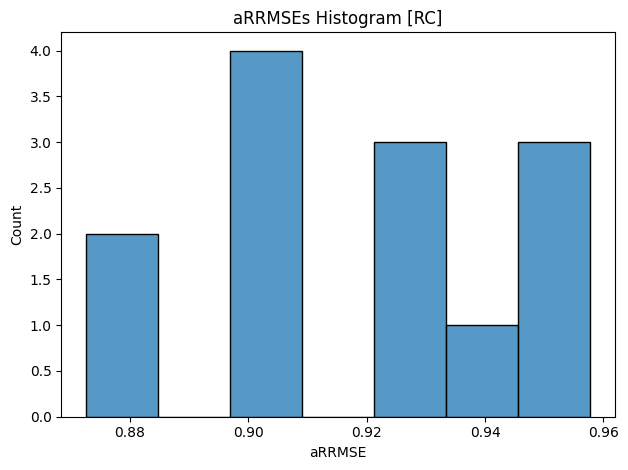

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


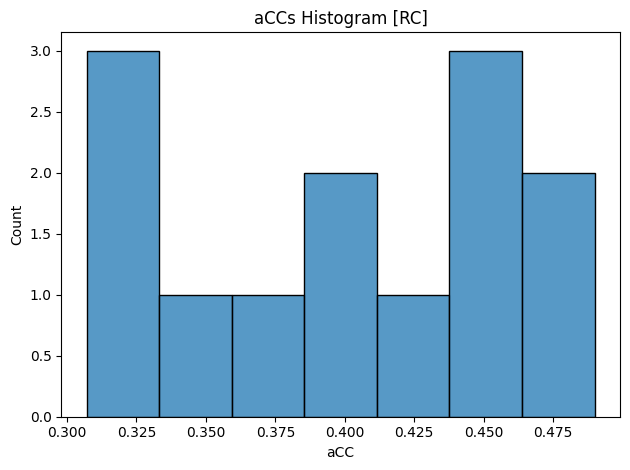

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


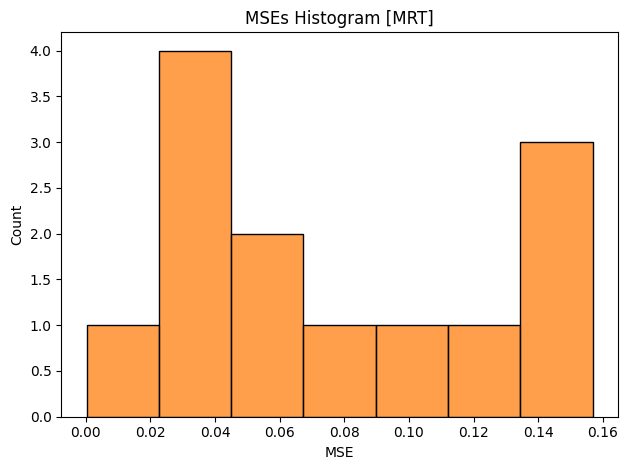

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


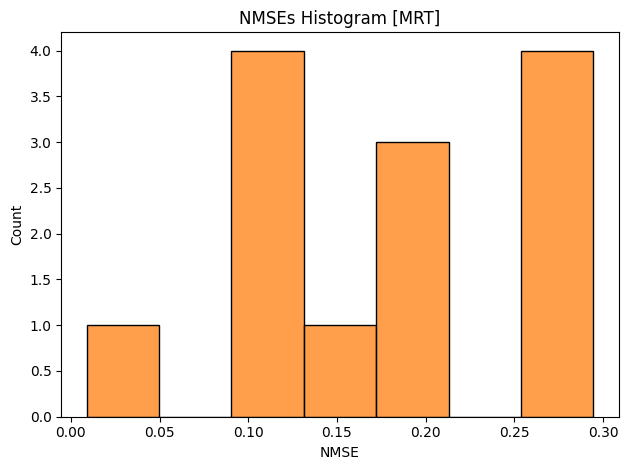

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


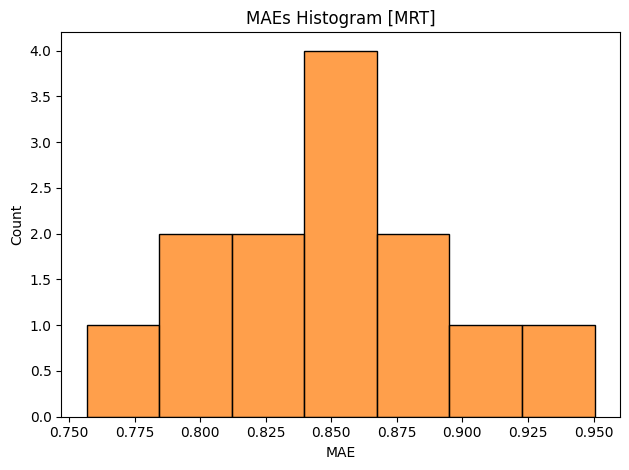

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


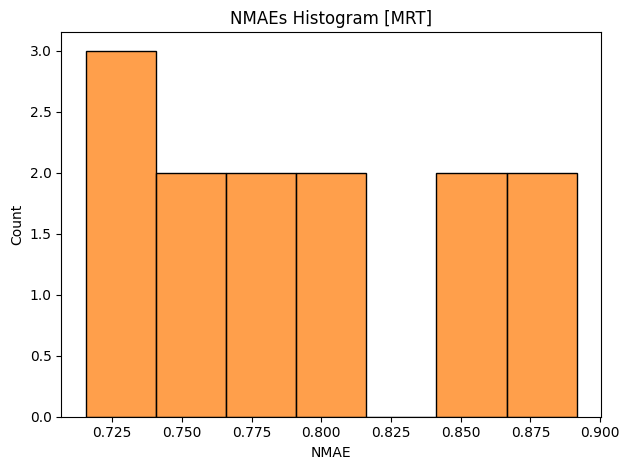

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


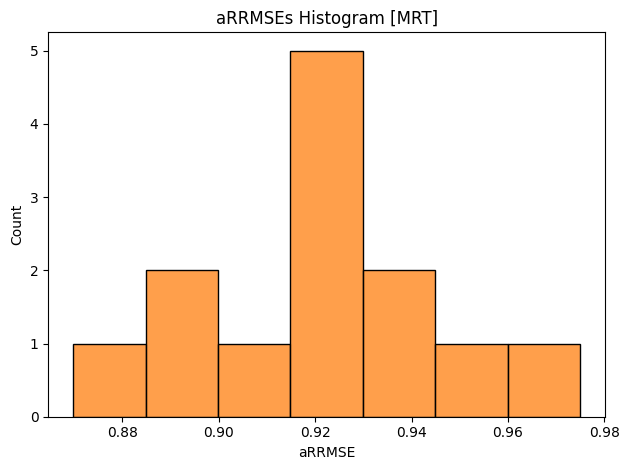

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


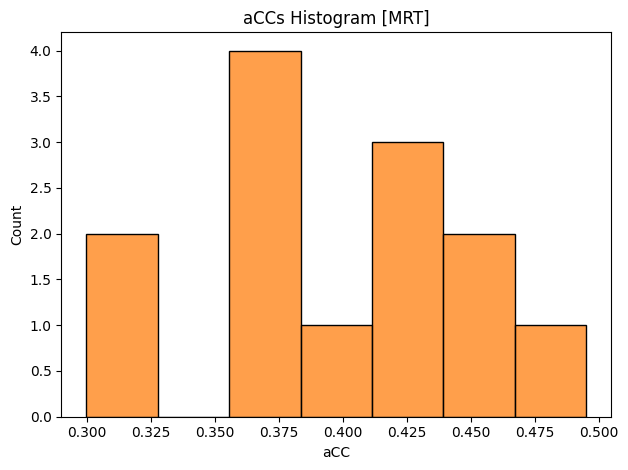

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


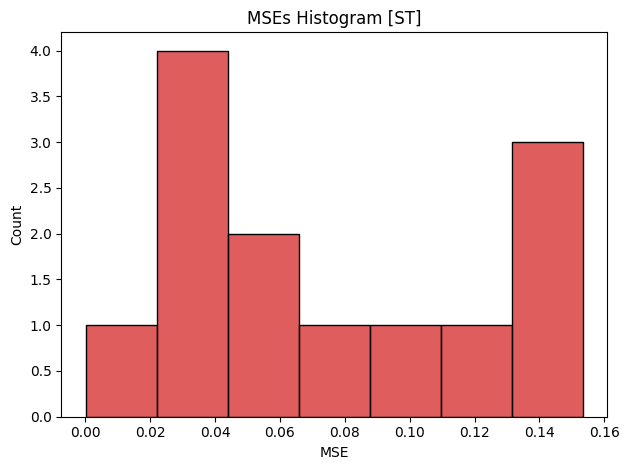

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


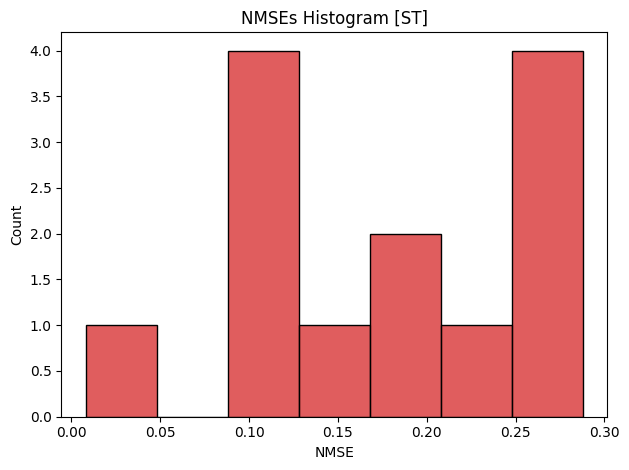

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


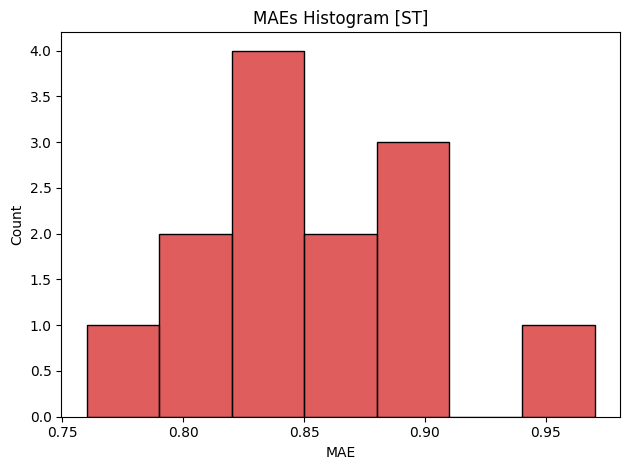

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


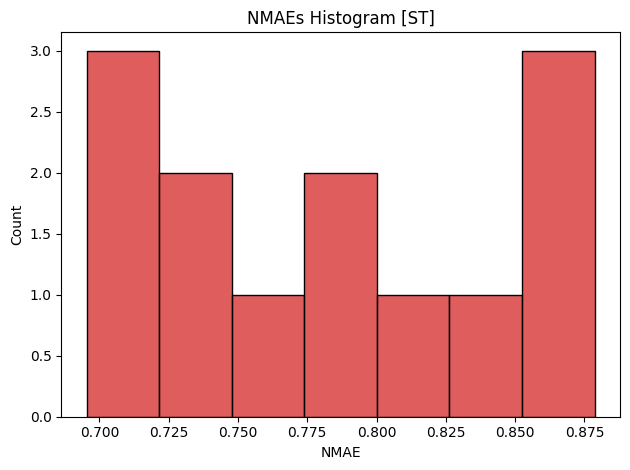

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


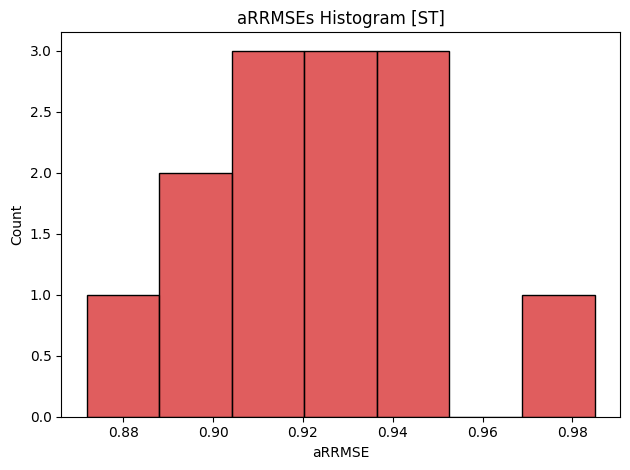

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


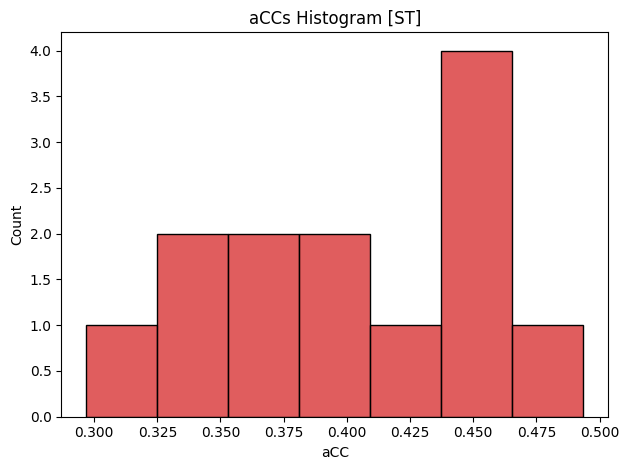

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


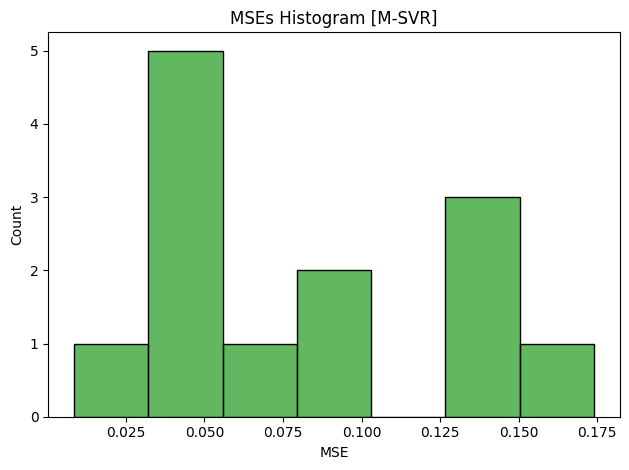

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


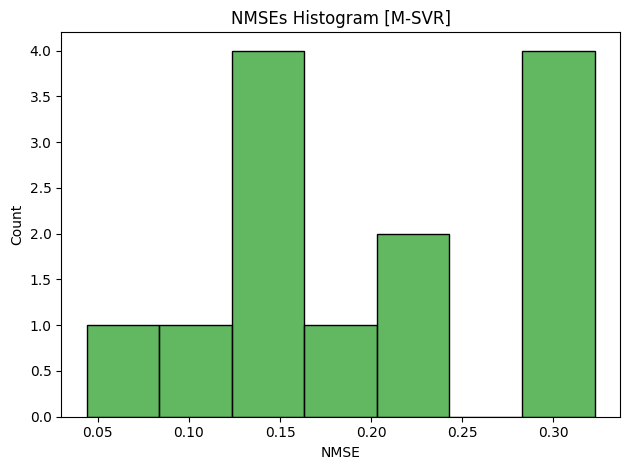

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


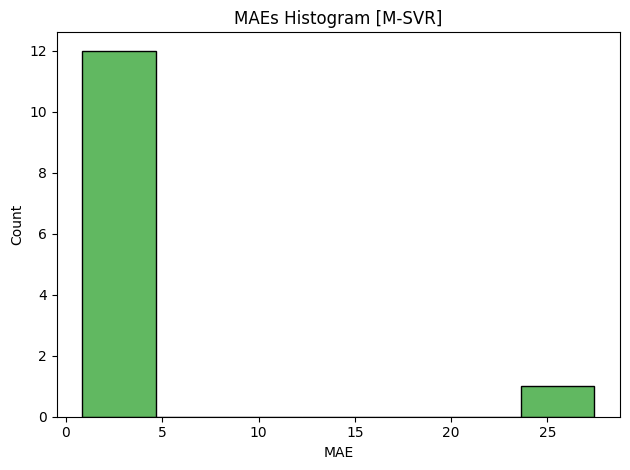

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


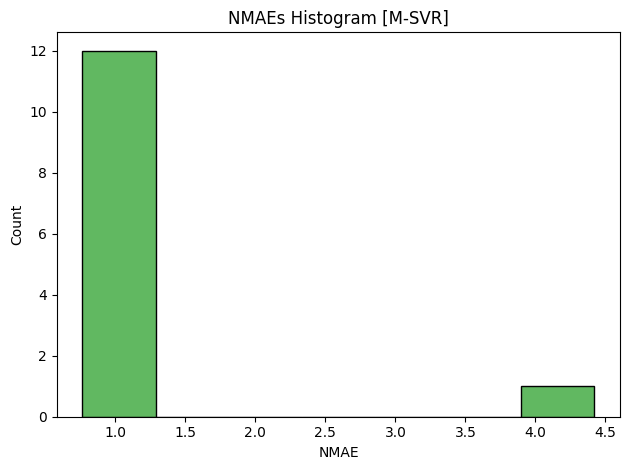

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


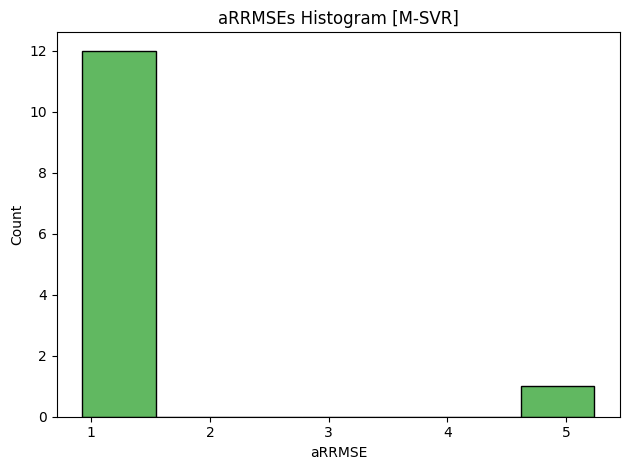

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


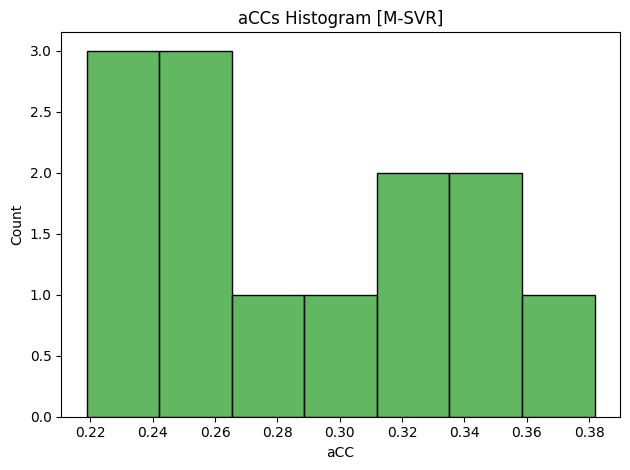

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


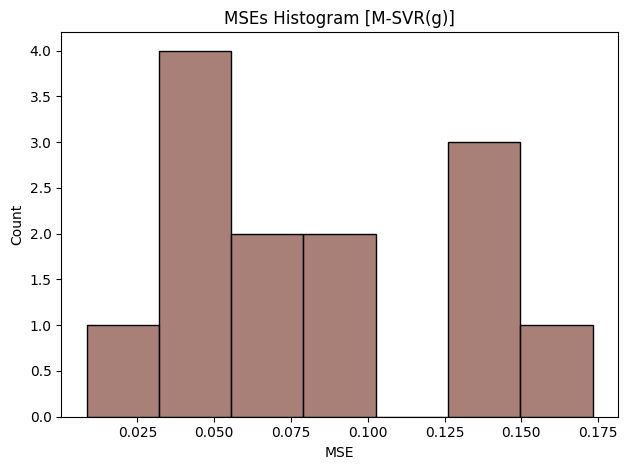

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


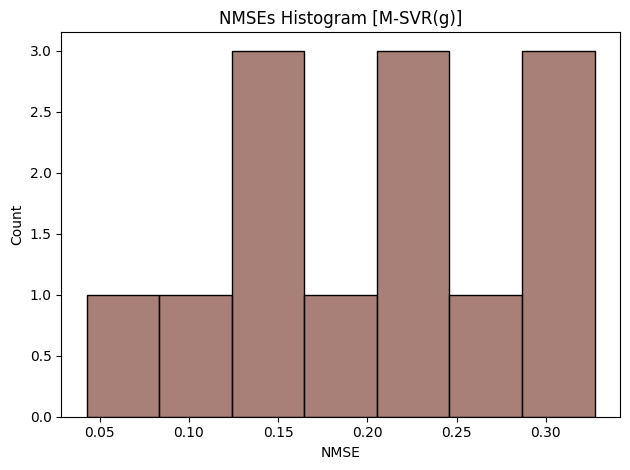

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


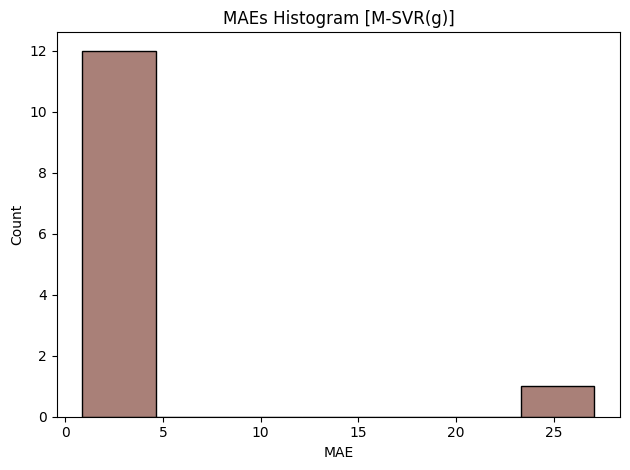

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


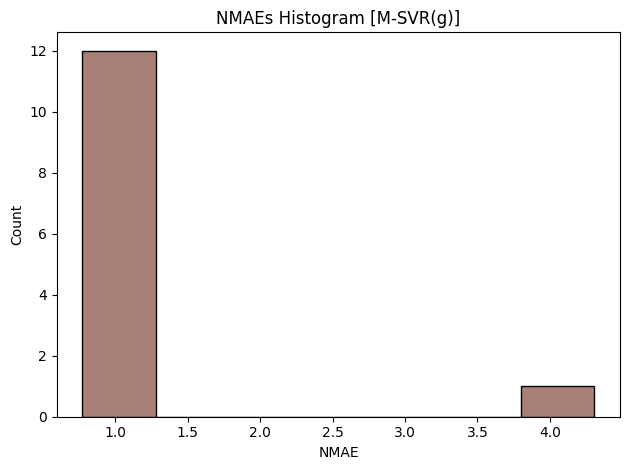

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


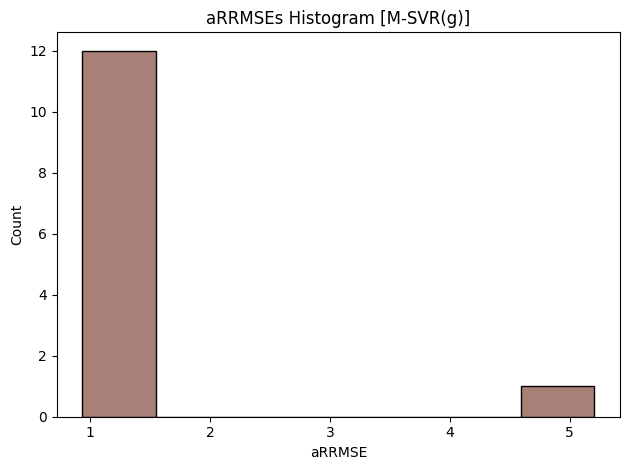

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


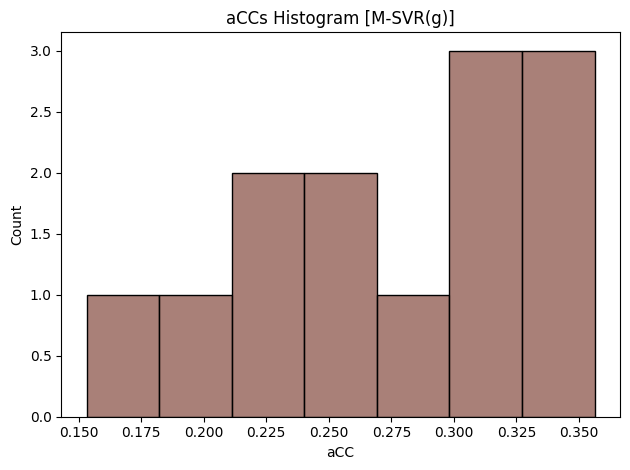

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


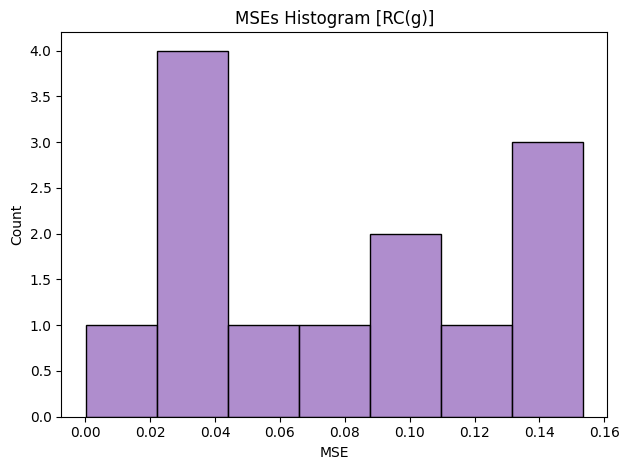

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


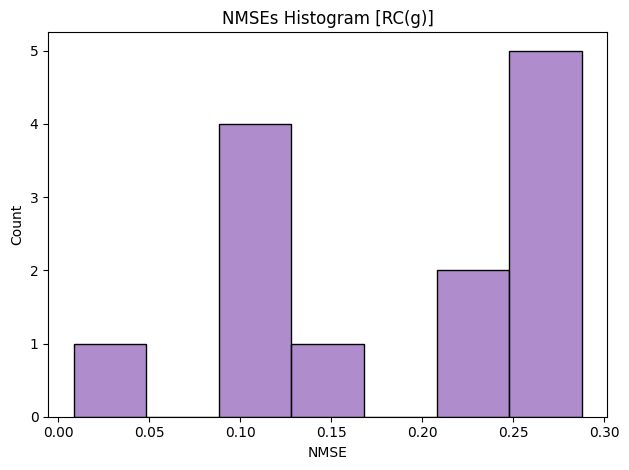

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


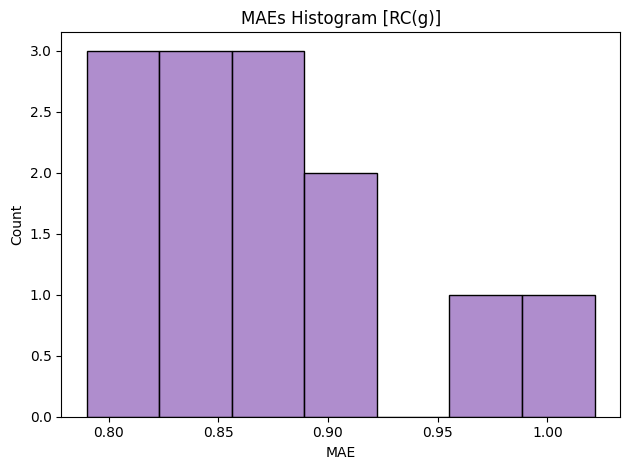

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


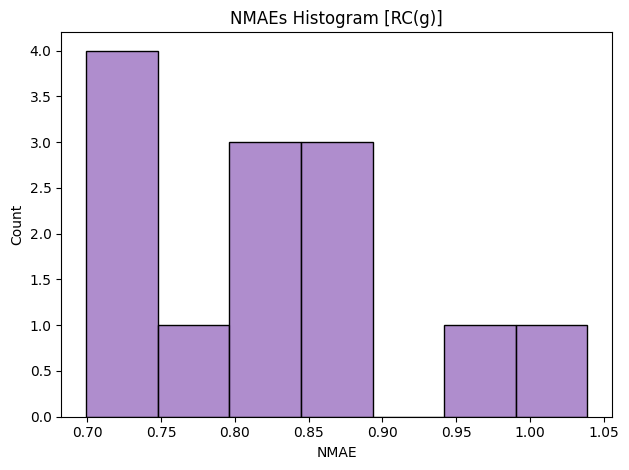

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


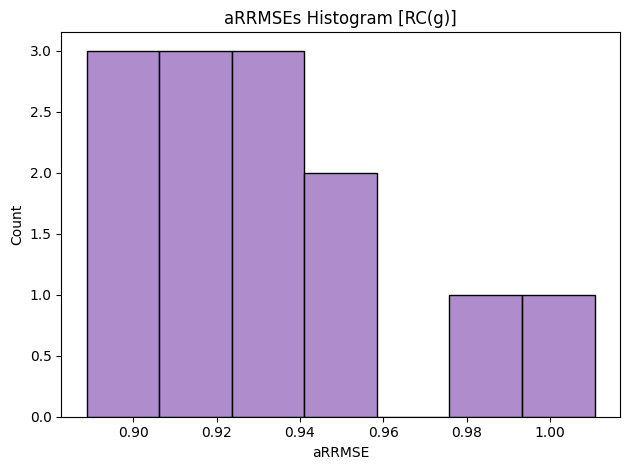

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


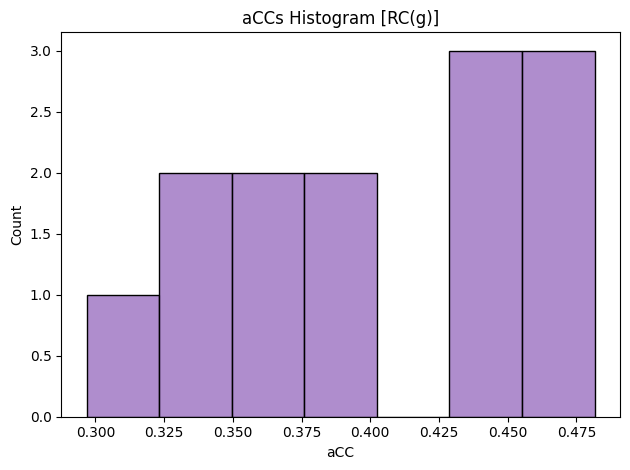

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


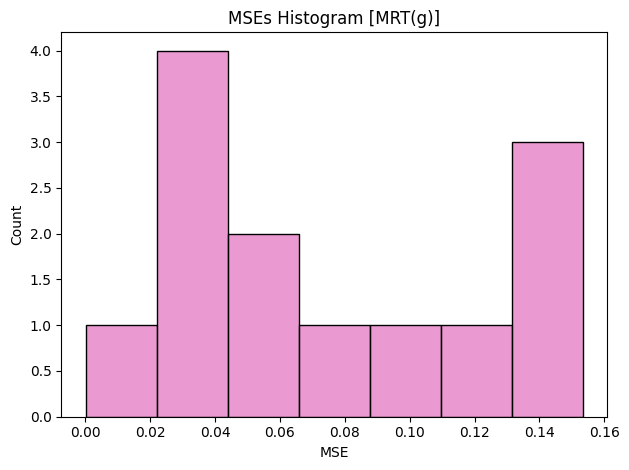

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


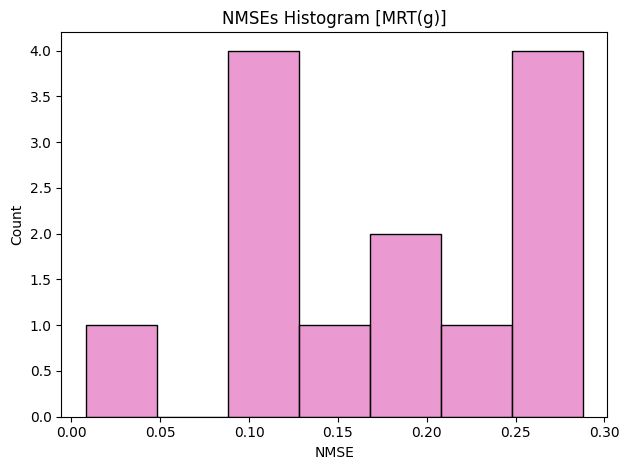

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


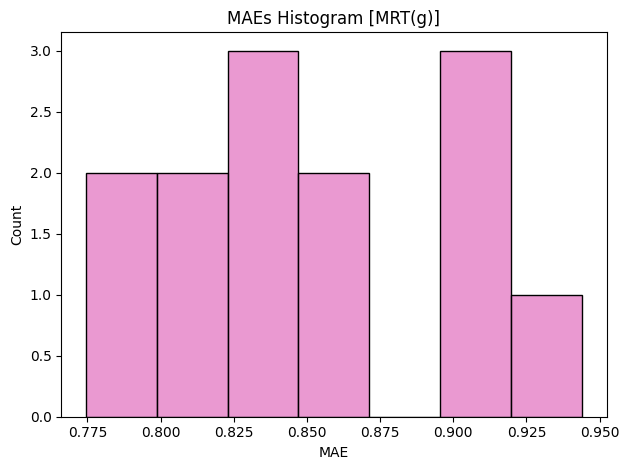

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


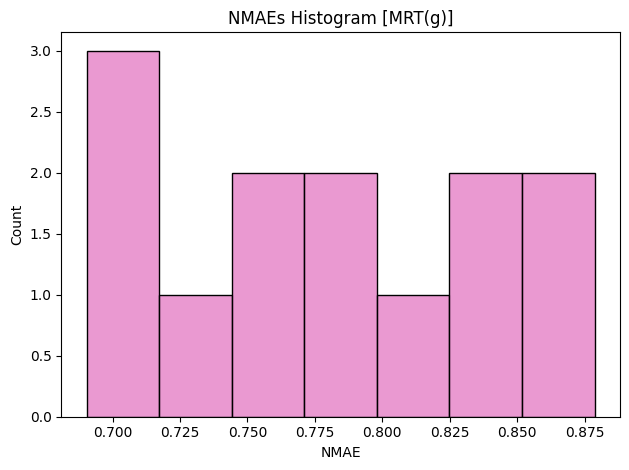

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


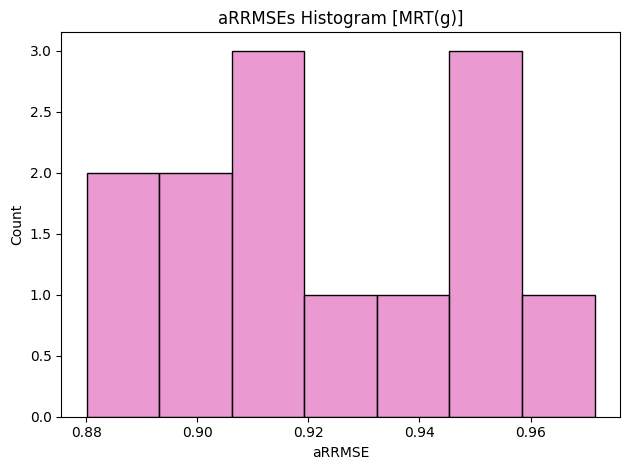

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


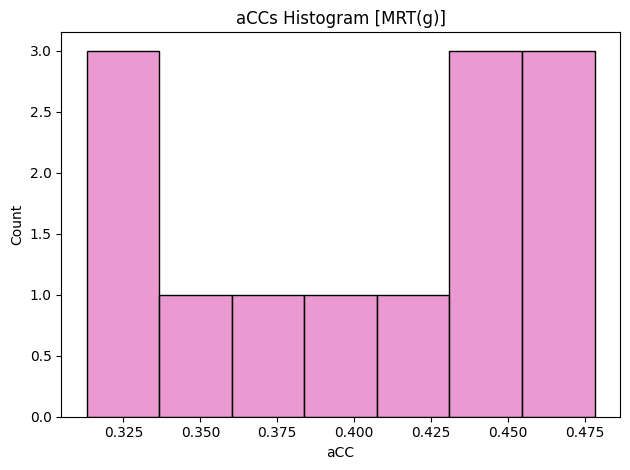

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [196]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.153325  0.849345  0.287726  0.796725  0.921599   
1        ST         sgd  0.041294  0.805318  0.124518  0.701221  0.897395   
2        ST          lr  0.037319  0.808483  0.116097  0.695384  0.899157   
3        ST         knn  0.122224  0.898261  0.270177  0.878673  0.947766   
4        ST  svm_linear  0.042197  0.825686  0.122798  0.696288  0.908673   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.032466  0.824435  0.102386  0.715437  0.907984   
87    RC(g)     rforest  0.070478  0.858956  0.219478  0.960591  0.926799   
88    RC(g)          gb  0.138433  0.882543  0.257027  0.783275  0.939438   
89    RC(g)        adab  0.000258  0.826838  0.008307  0.837356  0.909306   
90    RC(g)         xgb  0.095387  0.873833  0.213429  0.818208   0.93479   

         aCC  
0     0.3973  
1   0.462458  
2   0.462045  
3   0.333111  
4   0.441369  
..       ...  
86  0.437141  
87  0.481603  
88  0.360295  
89  0.438088  
90  0.390474  

[91 rows x 8 columns]

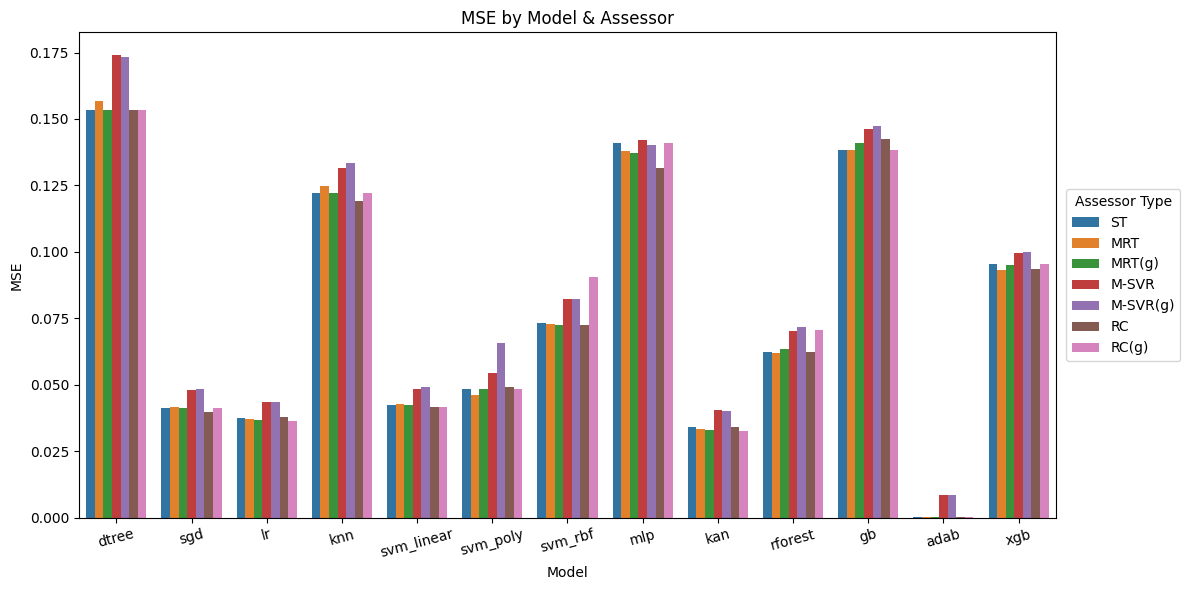

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


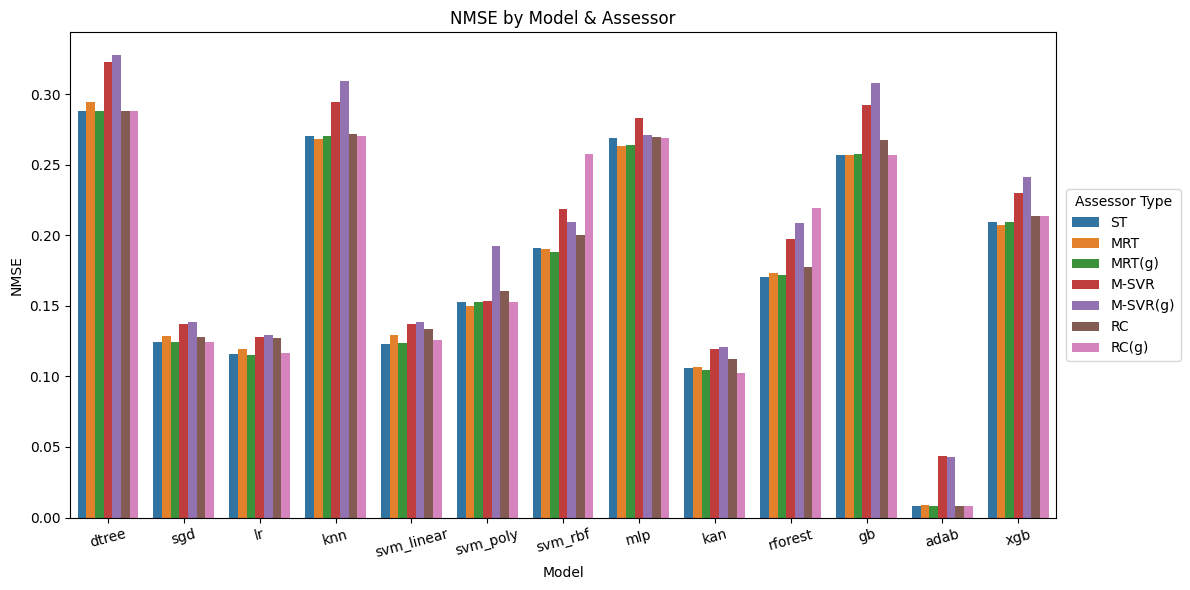

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


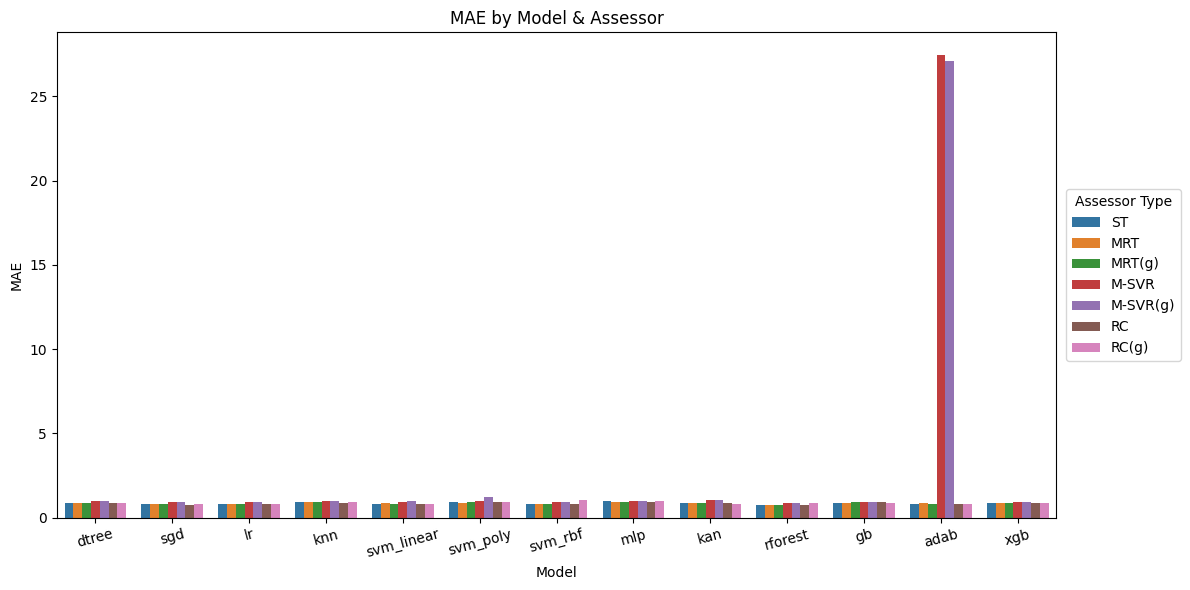

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


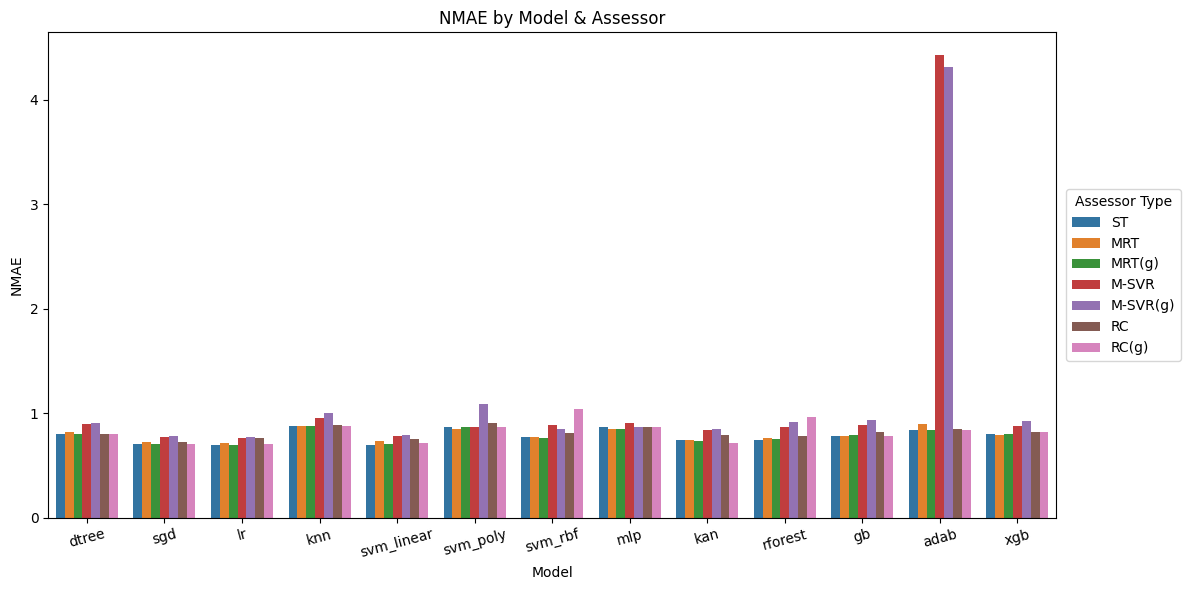

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


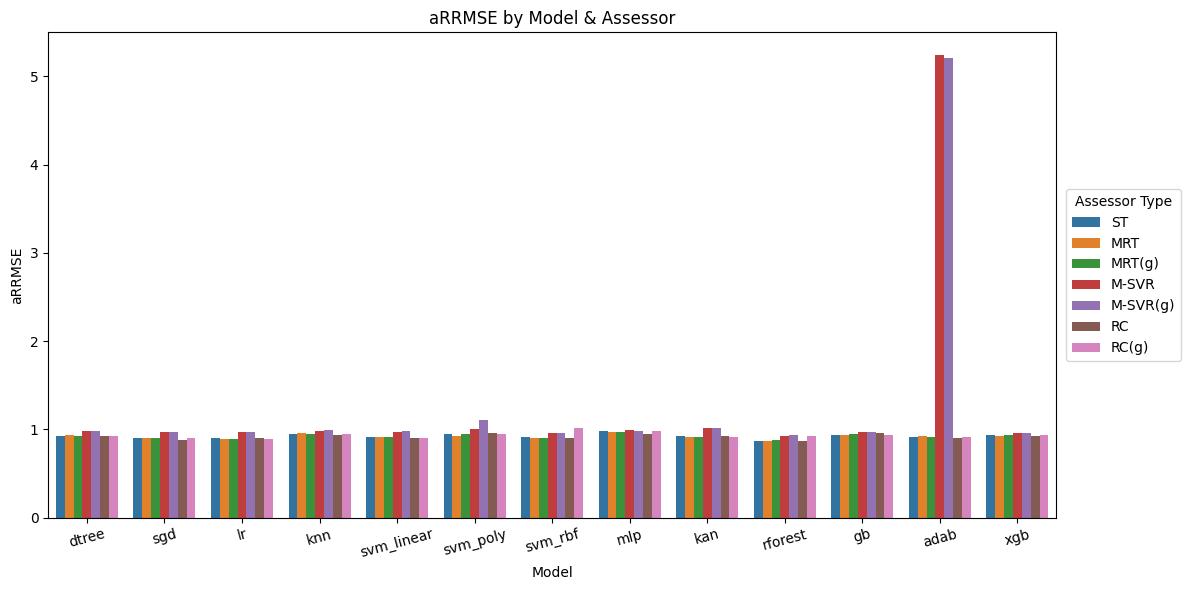

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


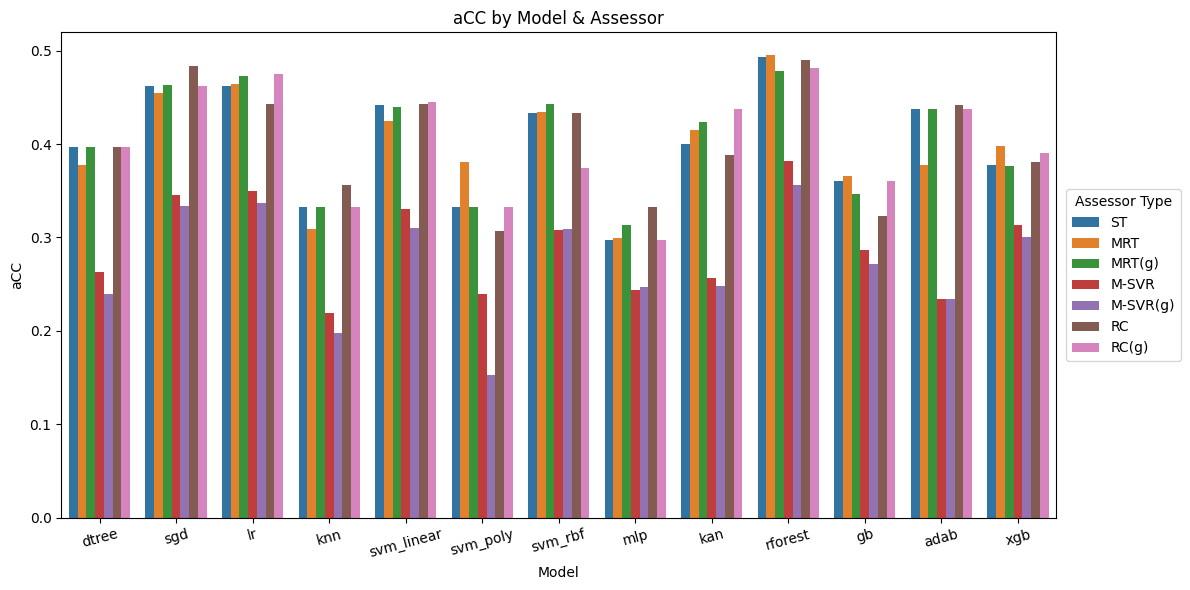

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [170]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

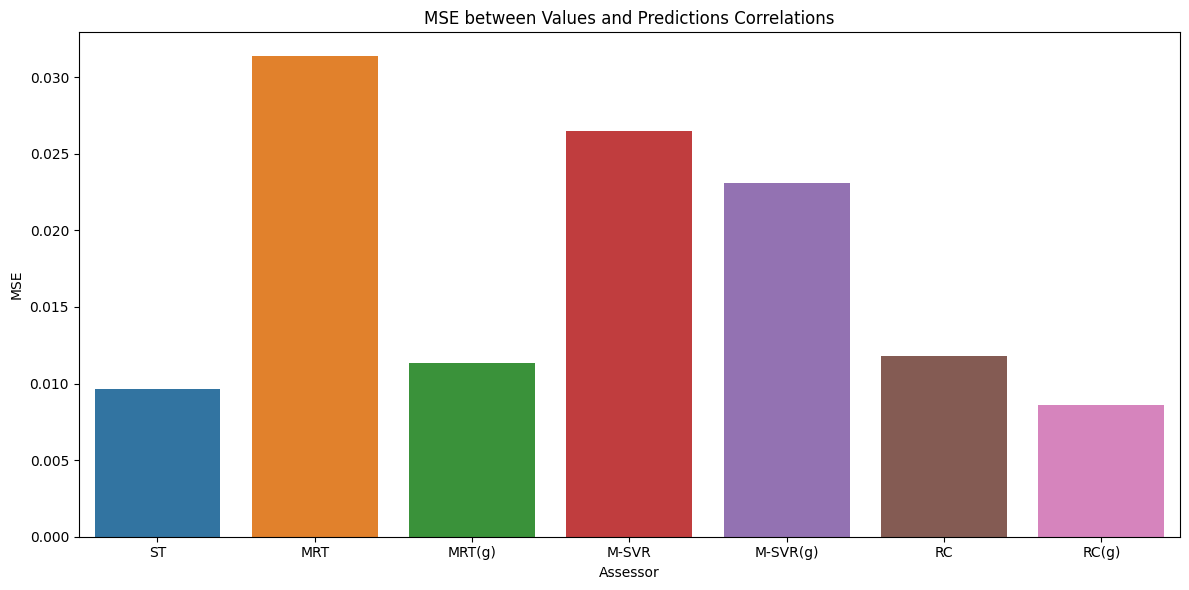

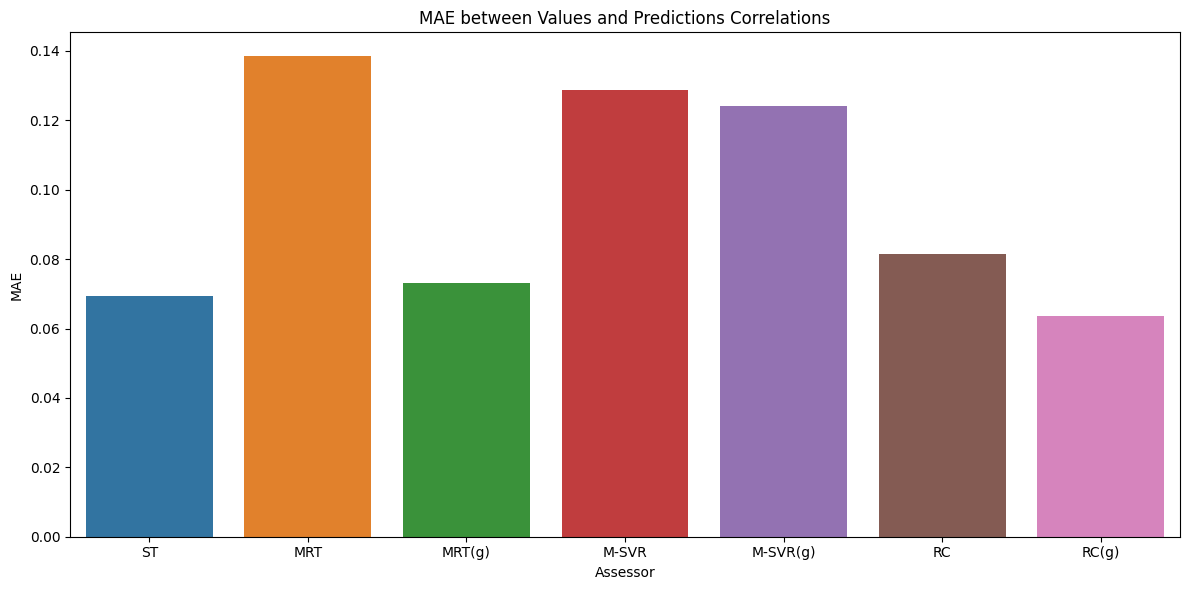

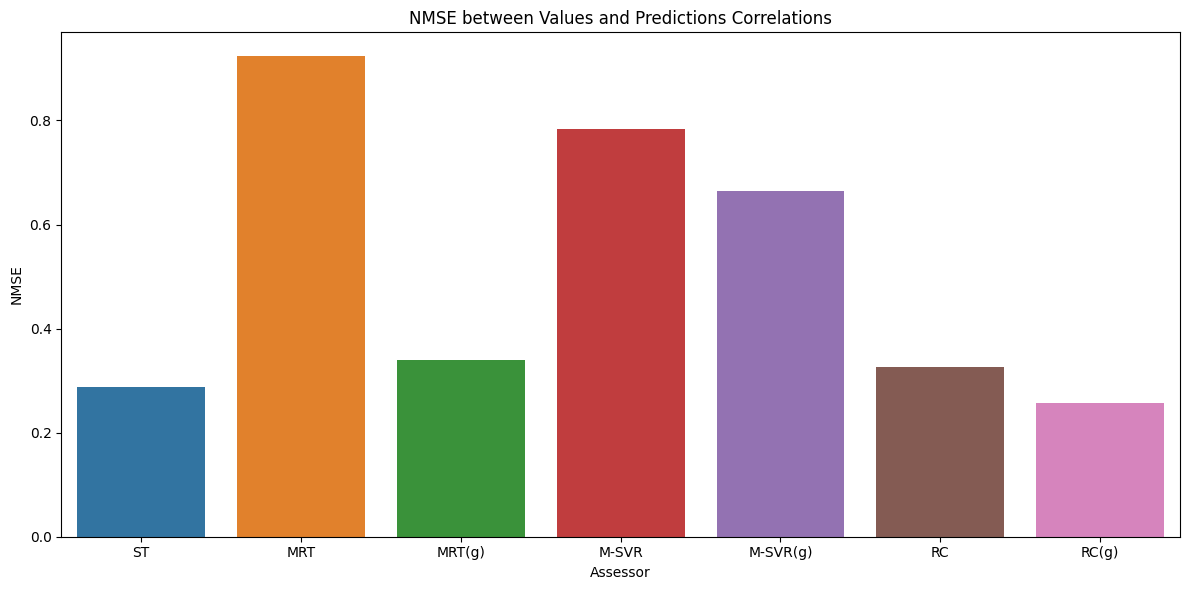

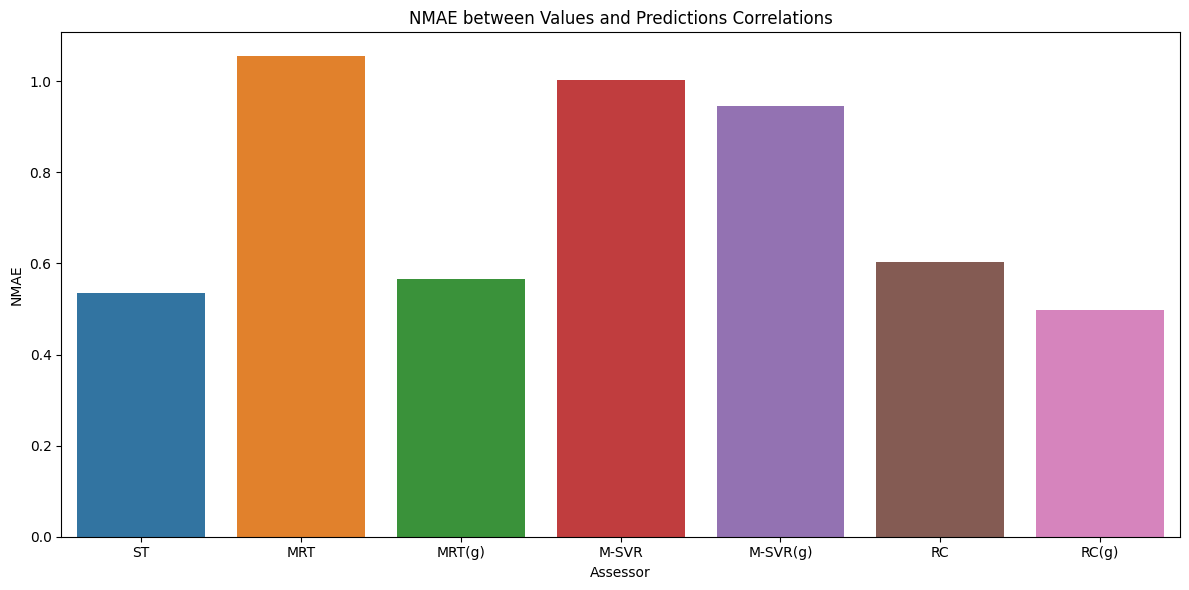

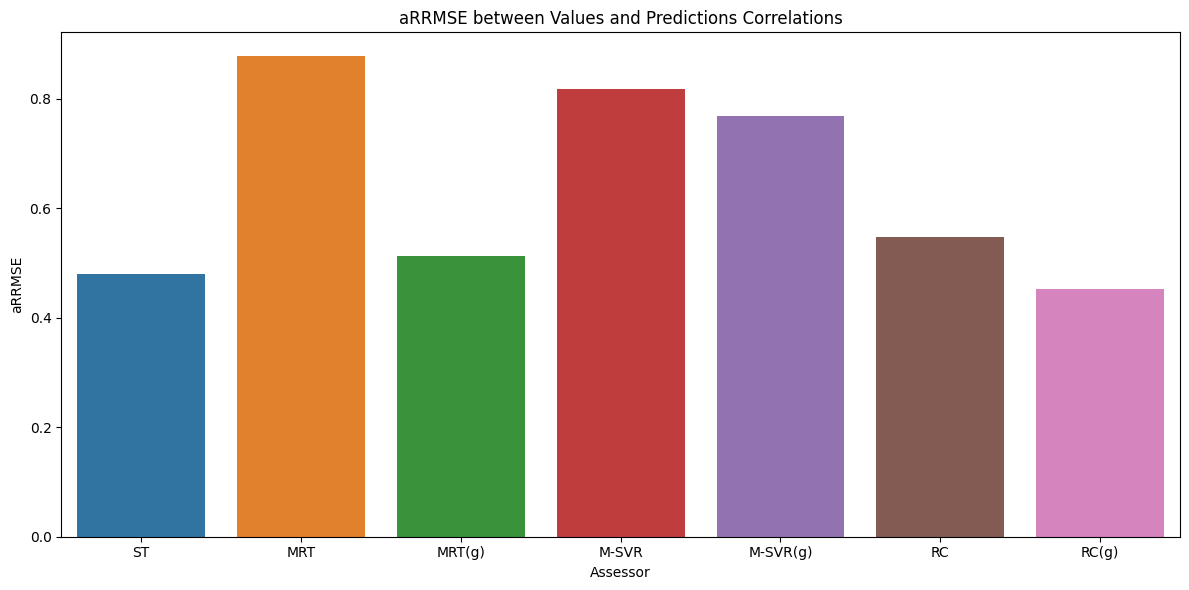

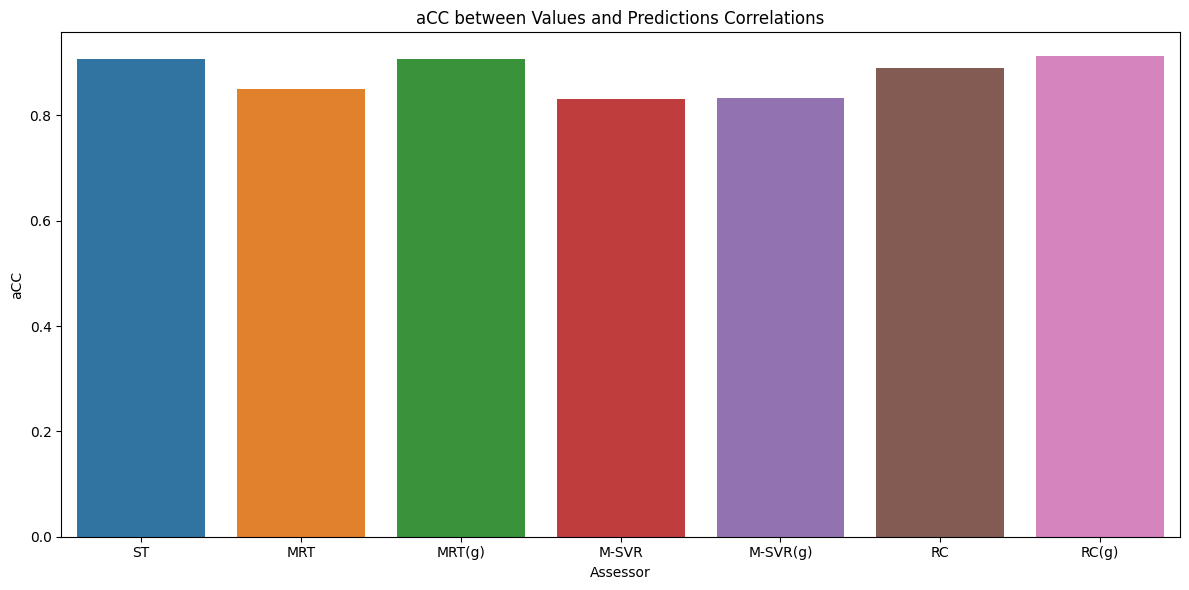

In [201]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)